In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import statsmodels.api as sm

In [3]:
df1 = pd.read_csv('ConsumerElectronics.csv')

In [4]:
df1.head()

fsn_id           order_date  Year  Month      order_id  \
0  ACCCX3S58G7B5F6P  2015-10-17 15:11:54  2015     10  3.419301e+15   
1  ACCCX3S58G7B5F6P  2015-10-19 10:07:22  2015     10  1.420831e+15   
2  ACCCX3S5AHMF55FV  2015-10-20 15:45:56  2015     10  2.421913e+15   
3  ACCCX3S5AHMF55FV  2015-10-14 12:05:15  2015     10  4.416592e+15   
4  ACCCX3S5AHMF55FV  2015-10-17 21:25:03  2015     10  4.419525e+15   

   order_item_id   gmv  units deliverybdays deliverycdays  \
0   3.419301e+15  6400      1            \N            \N   
1   1.420831e+15  6900      1            \N            \N   
2   2.421913e+15  1990      1            \N            \N   
3   4.416592e+15  1690      1            \N            \N   
4   4.419525e+15  1618      1            \N            \N   

  s1_fact.order_payment_type  sla                 cust_id  \
0                        COD    5  -1.01299130778588E+018   
1                        COD    7  -8.99032457905512E+018   
2                        COD   10   -1.0404429420466E+018   
3                    Prepaid    4  -7.60496084352714E+018   
4                    Prepaid    6    2.8945572083453E+018   

                  pincode product_analytic_super_category  \
0  -7.79175582905735E+018                              CE   
1   7.33541149097431E+018                              CE   
2  -7.47768776228657E+018                              CE   
3  -5.83593163877661E+018                              CE   
4   5.34735360997242E+017                              CE   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  
0              CameraTripod         7190                        0  
1              CameraTripod         7190                        0  
2              CameraTripod         2099                        3  
3              CameraTripod         2099                        3  
4              CameraTripod         2099                        3

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
fsn_id                             1648824 non-null object
order_date                         1648824 non-null object
Year                               1648824 non-null int64
Month                              1648824 non-null int64
order_id                           1648824 non-null float64
order_item_id                      1648824 non-null float64
gmv                                1648824 non-null object
units                              1648824 non-null int64
deliverybdays                      1648824 non-null object
deliverycdays                      1648824 non-null object
s1_fact.order_payment_type         1648824 non-null object
sla                                1648824 non-null int64
cust_id                            1648824 non-null object
pincode                            1648824 non-null object
product_analytic_super_category    1648824 non-null object
prod

Lets check each column one by one

In [6]:
#converting order_date to datetime
df1['order_date'] = pd.to_datetime(df1['order_date'])

In [7]:
df1['order_date'].dtype

dtype('<M8[ns]')

We have to check if year and month match the order_date

In [8]:
df1 = df1[ df1['order_date'].dt.year == df1['Year']]

In [9]:
df1.shape

(1648824, 20)

In [10]:
df1 = df1[ df1['order_date'].dt.month == df1['Month']]

In [11]:
df1.shape

(1648824, 20)

df1.shape remain the same. Hence data is consistent

In [12]:
# We have to covert order_id and order_item_id into proper format

In [13]:
df1['order_id'] = df1['order_id'].map(lambda x : '{:.0f}'.format(x))

In [14]:
df1['order_item_id'] = df1['order_item_id'].map(lambda x : '{:.0f}'.format(x))

In [15]:
df1.head()

fsn_id          order_date  Year  Month          order_id  \
0  ACCCX3S58G7B5F6P 2015-10-17 15:11:54  2015     10  3419300926147000   
1  ACCCX3S58G7B5F6P 2015-10-19 10:07:22  2015     10  1420830839915200   
2  ACCCX3S5AHMF55FV 2015-10-20 15:45:56  2015     10  2421912925714800   
3  ACCCX3S5AHMF55FV 2015-10-14 12:05:15  2015     10  4416592101738400   
4  ACCCX3S5AHMF55FV 2015-10-17 21:25:03  2015     10  4419525153426400   

      order_item_id   gmv  units deliverybdays deliverycdays  \
0  3419300926147000  6400      1            \N            \N   
1  1420830839915200  6900      1            \N            \N   
2  2421912925714800  1990      1            \N            \N   
3  4416592101738400  1690      1            \N            \N   
4  4419525153426400  1618      1            \N            \N   

  s1_fact.order_payment_type  sla                 cust_id  \
0                        COD    5  -1.01299130778588E+018   
1                        COD    7  -8.99032457905512E+018   
2                        COD   10   -1.0404429420466E+018   
3                    Prepaid    4  -7.60496084352714E+018   
4                    Prepaid    6    2.8945572083453E+018   

                  pincode product_analytic_super_category  \
0  -7.79175582905735E+018                              CE   
1   7.33541149097431E+018                              CE   
2  -7.47768776228657E+018                              CE   
3  -5.83593163877661E+018                              CE   
4   5.34735360997242E+017                              CE   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  
0              CameraTripod         7190                        0  
1              CameraTripod         7190                        0  
2              CameraTripod         2099                        3  
3              CameraTripod         2099                        3  
4              CameraTripod         2099                        3

In [16]:
df1.dtypes

fsn_id                                     object
order_date                         datetime64[ns]
Year                                        int64
Month                                       int64
order_id                                   object
order_item_id                              object
gmv                                        object
units                                       int64
deliverybdays                              object
deliverycdays                              object
s1_fact.order_payment_type                 object
sla                                         int64
cust_id                                    object
pincode                                    object
product_analytic_super_category            object
product_analytic_category                  object
product_analytic_sub_category              object
product_analytic_vertical                  object
product_mrp                                 int64
product_procurement_sla                     int64


order_id and order_item_id are object types now

In [17]:
#gmv
#gmv should not be object type
df1['gmv'] = pd.to_numeric(df1['gmv'])

ValueError: Unable to parse string " " at position 8

In [18]:
df1.iloc[8, 6]

' '

In [19]:
df1.replace(' ', value = np.nan, inplace=True)

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
fsn_id                             1648824 non-null object
order_date                         1648824 non-null datetime64[ns]
Year                               1648824 non-null int64
Month                              1648824 non-null int64
order_id                           1648824 non-null object
order_item_id                      1648824 non-null object
gmv                                1643920 non-null object
units                              1648824 non-null int64
deliverybdays                      1648824 non-null object
deliverycdays                      1648824 non-null object
s1_fact.order_payment_type         1648824 non-null object
sla                                1648824 non-null int64
cust_id                            1643920 non-null object
pincode                            1643920 non-null object
product_analytic_super_category    1648824 non-null objec

In [21]:
df1.isnull().sum()

fsn_id                                0
order_date                            0
Year                                  0
Month                                 0
order_id                              0
order_item_id                         0
gmv                                4904
units                                 0
deliverybdays                         0
deliverycdays                         0
s1_fact.order_payment_type            0
sla                                   0
cust_id                            4904
pincode                            4904
product_analytic_super_category       0
product_analytic_category             0
product_analytic_sub_category         0
product_analytic_vertical             0
product_mrp                           0
product_procurement_sla               0
dtype: int64

In [22]:
len(df1.index)

1648824

In [23]:
df1.dropna(inplace=True)

In [24]:
df1['gmv'] = pd.to_numeric(df1['gmv'])

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1643920 entries, 0 to 1648823
Data columns (total 20 columns):
fsn_id                             1643920 non-null object
order_date                         1643920 non-null datetime64[ns]
Year                               1643920 non-null int64
Month                              1643920 non-null int64
order_id                           1643920 non-null object
order_item_id                      1643920 non-null object
gmv                                1643920 non-null float64
units                              1643920 non-null int64
deliverybdays                      1643920 non-null object
deliverycdays                      1643920 non-null object
s1_fact.order_payment_type         1643920 non-null object
sla                                1643920 non-null int64
cust_id                            1643920 non-null object
pincode                            1643920 non-null object
product_analytic_super_category    1643920 non-null obje

In [26]:
df1['deliverybdays'].value_counts()

\N     1308070
4        62062
5        60594
3        53701
6        48655
2        37513
7        25566
1        19862
8        12464
9         5929
10        2924
0         2359
11        1552
12         870
13         448
14         255
15         164
16          94
17          80
18          47
19          47
20          25
21          20
26          20
23          18
38          16
27          16
28          15
32          15
72          13
        ...   
-44          1
77           1
-22          1
145          1
90           1
-53          1
-12          1
115          1
135          1
124          1
120          1
-46          1
-45          1
-74          1
-41          1
153          1
-42          1
-39          1
-76          1
85           1
238          1
-73          1
132          1
-13          1
114          1
-14          1
-40          1
-56          1
-98          1
147          1
Name: deliverybdays, Length: 143, dtype: int64

In [27]:
df1['deliverycdays'].value_counts()

\N      1308069
5         56417
6         51930
4         50627
3         40504
7         38456
2         28175
8         23259
1         15435
9         13536
10         7291
11         3885
12         2085
13         1215
14          656
0           538
15          423
16          235
17          161
18          119
19           85
20           68
21           38
22           34
23           31
24           19
27           17
31           17
32           16
37           12
         ...   
-11           1
-492          1
-115          1
133           1
-893          1
-849          1
-837          1
-879          1
-516          1
178           1
-544          1
99            1
-476          1
-153          1
-844          1
-532          1
-512          1
-482          1
-14           1
-25           1
-628          1
-840          1
-835          1
278           1
-16           1
80            1
100           1
140           1
-859          1
157           1
Name: deliverycdays, Len

In [28]:
df1.rename(columns = {'s1_fact.order_payment_type': 'order_payment_type'}, inplace = True)

In [29]:
df1.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'deliverybdays', 'deliverycdays', 'order_payment_type',
       'sla', 'cust_id', 'pincode', 'product_analytic_super_category',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla'],
      dtype='object')

In [30]:
df1['order_payment_type'].value_counts()

COD        1191443
Prepaid     452477
Name: order_payment_type, dtype: int64

In [31]:
df1['cust_id'] = df1['cust_id'].astype('float').map(lambda x: '{:.0f}'.format(x)) 

In [32]:
pd.options.display.float_format = '{:.0f}'.format

In [33]:
df1.dtypes

fsn_id                                     object
order_date                         datetime64[ns]
Year                                        int64
Month                                       int64
order_id                                   object
order_item_id                              object
gmv                                       float64
units                                       int64
deliverybdays                              object
deliverycdays                              object
order_payment_type                         object
sla                                         int64
cust_id                                    object
pincode                                    object
product_analytic_super_category            object
product_analytic_category                  object
product_analytic_sub_category              object
product_analytic_vertical                  object
product_mrp                                 int64
product_procurement_sla                     int64


In [34]:
df1['cust_id'].str.contains('-').sum() / len(df1.index)

0.5008844712638084

In [35]:
#replacing the negative sign
df1['cust_id'] = df1['cust_id'].str.replace('-', '')

In [36]:
df1.head()

fsn_id          order_date  Year  Month          order_id  \
0  ACCCX3S58G7B5F6P 2015-10-17 15:11:54  2015     10  3419300926147000   
1  ACCCX3S58G7B5F6P 2015-10-19 10:07:22  2015     10  1420830839915200   
2  ACCCX3S5AHMF55FV 2015-10-20 15:45:56  2015     10  2421912925714800   
3  ACCCX3S5AHMF55FV 2015-10-14 12:05:15  2015     10  4416592101738400   
4  ACCCX3S5AHMF55FV 2015-10-17 21:25:03  2015     10  4419525153426400   

      order_item_id  gmv  units deliverybdays deliverycdays  \
0  3419300926147000 6400      1            \N            \N   
1  1420830839915200 6900      1            \N            \N   
2  2421912925714800 1990      1            \N            \N   
3  4416592101738400 1690      1            \N            \N   
4  4419525153426400 1618      1            \N            \N   

  order_payment_type  sla              cust_id                 pincode  \
0                COD    5  1012991307785880064  -7.79175582905735E+018   
1                COD    7  8990324579055120384   7.33541149097431E+018   
2                COD   10  1040442942046599936  -7.47768776228657E+018   
3            Prepaid    4  7604960843527140352  -5.83593163877661E+018   
4            Prepaid    6  2894557208345299968   5.34735360997242E+017   

  product_analytic_super_category product_analytic_category  \
0                              CE           CameraAccessory   
1                              CE           CameraAccessory   
2                              CE           CameraAccessory   
3                              CE           CameraAccessory   
4                              CE           CameraAccessory   

  product_analytic_sub_category product_analytic_vertical  product_mrp  \
0               CameraAccessory              CameraTripod         7190   
1               CameraAccessory              CameraTripod         7190   
2               CameraAccessory              CameraTripod         2099   
3               CameraAccessory              CameraTripod         2099   
4               CameraAccessory              CameraTripod         2099   

   product_procurement_sla  
0                        0  
1                        0  
2                        3  
3                        3  
4                        3

In [37]:
#pincode

In [38]:
df1['pincode'] = df1['pincode'].astype('float').map(lambda x: '{:.0f}'.format(x))

In [39]:
df1['pincode']

0          -7791755829057349632
1           7335411490974310400
2          -7477687762286570496
3          -5835931638776609792
4            534735360997241984
5          -1919052697560310016
6           6404913202077570048
7          -1606303052019810048
9           -977901032130400000
10          7335411490974310400
11         -4769170644252180480
12         -7708160341195549696
13          6513330541343979520
14         -4383811865114310144
15         -6653644976793990144
16          5726907372992780288
17          7226616040407520256
18          6195476392333559808
19          -720491563443864960
20            70977690423612200
21         -5792152275811860480
22         -3614428528596839936
23            82482216656899904
24         -7770189663308850176
25         -6508700602667889664
26         -7898945419874690048
27          4396123426029219840
28          -105652543476615008
29          6807347461095109632
30          3630072327460210176
                   ...         
1648794 

In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1643920 entries, 0 to 1648823
Data columns (total 20 columns):
fsn_id                             1643920 non-null object
order_date                         1643920 non-null datetime64[ns]
Year                               1643920 non-null int64
Month                              1643920 non-null int64
order_id                           1643920 non-null object
order_item_id                      1643920 non-null object
gmv                                1643920 non-null float64
units                              1643920 non-null int64
deliverybdays                      1643920 non-null object
deliverycdays                      1643920 non-null object
order_payment_type                 1643920 non-null object
sla                                1643920 non-null int64
cust_id                            1643920 non-null object
pincode                            1643920 non-null object
product_analytic_super_category    1643920 non-null obje

In [41]:
df1.drop(['pincode'], axis = 1, inplace = True)

### Drop_duplicates

In [42]:
len(df1['cust_id'].unique())

1201089

In [43]:
len(df1['order_id'].unique())

1497298

In [44]:
len(df1['order_item_id'].unique())

1477119

In [45]:
df1['order_item_id'].duplicated()

0          False
1          False
2          False
3          False
4          False
5          False
6          False
7          False
9          False
10         False
11         False
12         False
13         False
14         False
15         False
16         False
17         False
18         False
19         False
20         False
21         False
22         False
23         False
24         False
25         False
26         False
27         False
28         False
29         False
30         False
           ...  
1648794     True
1648795     True
1648796     True
1648797     True
1648798     True
1648799     True
1648800     True
1648801     True
1648802     True
1648803     True
1648804     True
1648805     True
1648806     True
1648807     True
1648808     True
1648809     True
1648810     True
1648811     True
1648812     True
1648813     True
1648814     True
1648815     True
1648816     True
1648817     True
1648818     True
1648819     True
1648820     True
1648821     Tr

In [46]:
bool1 = df1.duplicated()

In [47]:
df1[bool1]

fsn_id          order_date  Year  Month          order_id  \
944830   ACCDH7MFZJGRWJCW 2016-04-27 00:19:25  2016      4  3575842474884000   
1003915  ACCEEZNUMY7CXMCG 2016-04-26 23:59:01  2016      4  3574266994510200   
1033341  AVMDX6TFZZQM7SXJ 2016-04-27 00:43:52  2016      4  3580255522322100   
1033407  AVMDX6TFZZQM7SXJ 2016-04-27 00:43:52  2016      4  3580255522322100   
1033492  AVMDX6TFZZQM7SXJ 2016-04-27 00:43:52  2016      4  3580255522322100   
1033640  AVMDX6TFZZQM7SXJ 2016-04-27 00:43:52  2016      4  3580255522322100   
1047433  GAME5UVFVTCJQ95Z 2016-04-27 00:38:59  2016      4  1566052031448600   
1047469  GAME5UVFVTCJQ95Z 2016-04-27 00:38:59  2016      4  1566052031448600   
1047527  GAME5UVFVTCJQ95Z 2016-04-27 00:38:59  2016      4  1566052031448600   
1047566  GAME5UVFVTCJQ95Z 2016-04-27 00:38:59  2016      4  1566052031448600   
1049284  GAME8YF95UHRMV2G 2016-04-27 01:04:32  2016      4  1566068267010100   
1049374  GAME8YF95UHRMV2G 2016-04-27 01:04:32  2016      4  1566068267010100   
1049558  GAME8YF95UHRMV2G 2016-04-27 01:04:32  2016      4  1566068267010100   
1067180  VGLE6HZV9WZQZ6JQ 2016-04-27 00:32:51  2016      4  1569674206074800   
1067181  VGLE6HZV9WZQZ6JQ 2016-04-27 00:32:51  2016      4  1569674206074800   
1067208  VGLE6HZV9WZQZ6JQ 2016-04-27 00:32:51  2016      4  1569674206074800   
1543997  ACCCX3S59WDFY7GF 2015-09-21 03:54:02  2015      9  2396425222235700   
1543998  ACCCX3S59WDFY7GF 2015-09-24 14:03:37  2015      9  3399388542830500   
1543999  ACCCX3S5AHMF55FV 2015-09-19 13:38:42  2015      9  3395050369801400   
1544000  ACCCX3S5AHMF55FV 2015-09-18 20:27:10  2015      9  4394434038204800   
1544001  ACCCX3S5AHMF55FV 2015-09-04 13:37:05  2015      9  4387422631705200   
1544002  ACCCX3S5AHMF55FV 2015-09-11 21:32:14  2015      9  4388425360023000   
1544003  ACCCX3S5JGAJETYR 2015-09-02 19:17:35  2015      9  2378842905112620   
1544004  ACCCX3S5JGAJETYR 2015-09-05 11:35:15  2015      9  3381987672835840   
1544005  ACCCX3S5MVJGVWSR 2015-09-12 21:56:32  2015      9  4389298417368400   
1544006  ACCCX3SG2FBJTDHW 2015-09-07 11:13:48  2015      9  3381987673664340   
1544007  ACCCX3SG2FBJTDHW 2015-09-08 19:13:15  2015      9  3381987674329310   
1544008  ACCCX3SG2FBJTDHW 2015-09-25 18:35:20  2015      9  1400416237141500   
1544009  ACCCX3SG2GG9YYAH 2015-08-31 12:49:32  2015      8         192932690   
1544010  ACCCX3SG2GG9YYAH 2015-09-09 07:30:52  2015      9  3381987674485920   
...                   ...                 ...   ...    ...               ...   
1648794  VPLEYAP3ZYYUVESU 2015-09-28 10:53:30  2015      9  3402725153373200   
1648795  VPLEYAP3ZYYUVESU 2015-09-01 21:12:52  2015      9  2378842904671240   
1648796  VPLEYAP3ZYYUVESU 2015-09-05 14:13:07  2015      9  3381987672905020   
1648797  VPLEYAP3ZYYUVESU 2015-09-12 08:31:37  2015      9  1388819865744800   
1648798  VPLEYAP3ZYYUVESU 2015-09-13 08:03:43  2015      9  3389668084500000   
1648799  VPLEYAP3ZYYUVESU 2015-09-29 12:12:38  2015      9  1403641653733300   
1648800  VPLEYAP3ZYYUVESU 2015-09-02 08:27:02  2015      9  2378842904804600   
1648801  VPLEYAP3ZYYUVESU 2015-09-10 11:05:47  2015      9  2387185260470700   
1648802  VPLEYAP3ZYYUVESU 2015-09-16 20:45:19  2015      9  2392716753987500   
1648803  VPLEYAP3ZYYUVESU 2015-09-21 12:34:35  2015      9  4396741931828700   
1648804  VPLEYAP3ZYYUVESU 2015-09-28 12:07:07  2015      9  4402769998646300   
1648805  VPLEYAP3ZYYUVESU 2015-09-03 15:33:29  2015      9  2378842905473820   
1648806  VPLEYAP3ZYYUVESU 2015-09-09 20:09:46  2015      9  3381987674768940   
1648807  VPLEYAP3ZYYUVESU 2015-09-13 18:22:33  2015      9  3390036882651800   
1648808  VPLEYAP3ZYYUVESU 2015-09-14 17:41:06  2015      9  3390878836170100   
1648809  VPLEYAP3ZYYUVESU 2015-09-23 12:06:38  2015      9  1398453656735500   
1648810  VPLEYAP3ZYYUVESU 2015-09-27 16:30:39  2015      9  4402069209632400   
1648811  VPLEYAP3ZYYUVESU 2015-09-02 17:49:38  2015      9  2378842905070380   
1648812  VPLEYAP3ZY

In [48]:
df1.drop_duplicates(inplace = True)

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1539943 entries, 0 to 1543996
Data columns (total 19 columns):
fsn_id                             1539943 non-null object
order_date                         1539943 non-null datetime64[ns]
Year                               1539943 non-null int64
Month                              1539943 non-null int64
order_id                           1539943 non-null object
order_item_id                      1539943 non-null object
gmv                                1539943 non-null float64
units                              1539943 non-null int64
deliverybdays                      1539943 non-null object
deliverycdays                      1539943 non-null object
order_payment_type                 1539943 non-null object
sla                                1539943 non-null int64
cust_id                            1539943 non-null object
product_analytic_super_category    1539943 non-null object
product_analytic_category          1539943 non-null obje

In [50]:
df1.duplicated().sum()

0

In [51]:
len(df1['order_item_id'].unique())

1477119

In [52]:
df1['order_item_id'].duplicated().sum()

62824

In [53]:
df1.drop_duplicates(subset = ['order_item_id'], keep='first', inplace=True)

In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1477119 entries, 0 to 1543996
Data columns (total 19 columns):
fsn_id                             1477119 non-null object
order_date                         1477119 non-null datetime64[ns]
Year                               1477119 non-null int64
Month                              1477119 non-null int64
order_id                           1477119 non-null object
order_item_id                      1477119 non-null object
gmv                                1477119 non-null float64
units                              1477119 non-null int64
deliverybdays                      1477119 non-null object
deliverycdays                      1477119 non-null object
order_payment_type                 1477119 non-null object
sla                                1477119 non-null int64
cust_id                            1477119 non-null object
product_analytic_super_category    1477119 non-null object
product_analytic_category          1477119 non-null obje

In [55]:
len(df1['order_id'].unique())

1474762

In [56]:
df1['order_id'].duplicated().sum()

2357

1477119 - 1474762 = 2357. Hence it matches.
An order_id can have multiple order_item_id

#we need data from july-2015(2015-07-01) to june-2016(2016-06-30)

In [57]:
#oldest timestamp in our data
df1['order_date'].min(axis=0)

Timestamp('2015-05-19 13:42:09')

In [58]:
#latest timestamp in our data
df1['order_date'].max(axis=0)

Timestamp('2016-07-25 01:19:45')

In [59]:
#Filtering the data
df1 = df1[(df1['order_date'] >= pd.to_datetime('2015-07-01')) & (df1['order_date'] <= pd.to_datetime('2016-06-30'))]

In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1473314 entries, 0 to 1543996
Data columns (total 19 columns):
fsn_id                             1473314 non-null object
order_date                         1473314 non-null datetime64[ns]
Year                               1473314 non-null int64
Month                              1473314 non-null int64
order_id                           1473314 non-null object
order_item_id                      1473314 non-null object
gmv                                1473314 non-null float64
units                              1473314 non-null int64
deliverybdays                      1473314 non-null object
deliverycdays                      1473314 non-null object
order_payment_type                 1473314 non-null object
sla                                1473314 non-null int64
cust_id                            1473314 non-null object
product_analytic_super_category    1473314 non-null object
product_analytic_category          1473314 non-null obje

In [61]:
df1['order_date'].min()

Timestamp('2015-07-01 00:36:11')

In [62]:
df1['sla'].value_counts()

6       211955
5       208376
4       196158
7       180241
3       157805
8       138988
2        95666
9        88347
1        67843
10       52255
11       30592
12       17587
13        9945
0         5472
14        5294
15        2882
16        1627
17         809
18         446
19         264
20         149
21         101
25          74
22          66
24          65
23          57
26          52
27          41
28          31
30          28
29          16
31          10
32           8
35           7
33           6
42           5
38           5
39           5
34           4
44           3
41           3
40           3
36           3
61           3
37           2
45           2
60           1
239          1
175          1
145          1
68           1
1004         1
56           1
52           1
51           1
47           1
46           1
43           1
1006         1
Name: sla, dtype: int64

In [63]:
df1['product_procurement_sla'].value_counts()

 2       475557
 1       275089
 3       270464
 5       195728
 4       107758
-1        67365
 0        39408
 6        15405
 7        10809
 15        5977
 14        4624
 1000      3980
 13         470
 8          468
 9           88
 10          68
 12          56
Name: product_procurement_sla, dtype: int64

In [64]:
df1 = df1[(df1['sla'] >=0) & (df1['sla'] <= 60)]

In [65]:
df1 = df1[(df1['product_procurement_sla'] >=0) & (df1['product_procurement_sla'] <= 60)]

In [66]:
df1.shape

(1401964, 19)

In [67]:
product_analytic_super_category    1473314 non-null object
product_analytic_category          1473314 non-null object
product_analytic_sub_category      1473314 non-null object
product_analytic_vertical

SyntaxError: invalid syntax (<ipython-input-67-db592981cfe1>, line 1)

In [68]:
df1['product_analytic_super_category'].value_counts()

CE    1401964
Name: product_analytic_super_category, dtype: int64

In [69]:
df1.drop(['product_analytic_super_category'], axis=1, inplace=True)

In [70]:
df1['product_analytic_category'].value_counts()

EntertainmentSmall    807114
CameraAccessory       218717
GamingHardware        203357
GameCDDVD              88118
Camera                 84658
Name: product_analytic_category, dtype: int64

In [71]:
df1['product_analytic_sub_category'].value_counts()

Speaker                455682
CameraAccessory        203040
GamingAccessory        178191
TVVideoSmall           127469
HomeAudio              107763
AudioMP3Player          98914
Game                    88040
Camera                  84658
GamingConsole           25166
CameraStorage           15677
AudioAccessory           9924
HomeTheatre              4109
AmplifierReceiver        3253
GameMembershipCards        78
Name: product_analytic_sub_category, dtype: int64

In [72]:
df = df1[(df1['product_analytic_sub_category'] == 'CameraAccessory') |
         (df1['product_analytic_sub_category'] == 'GamingAccessory') |
         (df1['product_analytic_sub_category'] == 'HomeAudio')]

In [73]:
df.shape

(488994, 18)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488994 entries, 0 to 1542378
Data columns (total 18 columns):
fsn_id                           488994 non-null object
order_date                       488994 non-null datetime64[ns]
Year                             488994 non-null int64
Month                            488994 non-null int64
order_id                         488994 non-null object
order_item_id                    488994 non-null object
gmv                              488994 non-null float64
units                            488994 non-null int64
deliverybdays                    488994 non-null object
deliverycdays                    488994 non-null object
order_payment_type               488994 non-null object
sla                              488994 non-null int64
cust_id                          488994 non-null object
product_analytic_category        488994 non-null object
product_analytic_sub_category    488994 non-null object
product_analytic_vertical        488994 non

In [81]:
df['product_mrp'].min()

63

In [97]:
df[['gmv', 'units', 'product_mrp']]

gmv  units  product_mrp
0        6400      1         7190
1        6900      1         7190
2        1990      1         2099
3        1690      1         2099
4        1618      1         2099
5        3324      1         4044
6        3695      1         4044
7        3695      1         4044
9        3695      1         4044
10       3695      1         4044
11       6750      1         7150
12       6750      1         7150
13       6675      1         7150
14       6750      1         7150
15       6749      1         7150
16       6075      1         7150
17       6670      1         7150
18       6749      1         7150
19       6749      1         7150
20       6670      1         7150
21       6750      1         7150
22       6670      1         7150
23       6749      1         7150
24       6749      1         7150
25       6003      1         7150
26       6749      1         7150
27       6749      1         7150
28       6749      1         7150
29       6750      1         7150
30       6003      1         7150
...       ...    ...          ...
1542326  1499      1         2499
1542327  1299      1         2499
1542328  1299      1         2499
1542329  1299      1         2499
1542330  1299      1         2499
1542331  1499      1         2499
1542335  1499      1         2499
1542340  1299      1         2499
1542341  1299      1         2499
1542342  1299      1         2499
1542343  1299      1         2499
1542344  1299      1         2499
1542345  4999      1         7499
1542346  4999      1         7499
1542347  4299      1        10500
1542352  5200      1        10500
1542354  4399      1        10500
1542355  5200      1        10500
1542356  4280      1        10500
1542358  5200      1        10500
1542359  4299      1        10500
1542367  4399      1        10500
1542368  5200      1        10500
1542369  4140      1        10500
1542371 10600      2        10500
1542372  5300      1        10500
1542373  5399      1        10500
1542374  5200      1        10500
1542375  5200      1        10500
1542378  5399      1        10500

[488994 rows x 3 columns]

In [92]:
df['week'] = df['order_date'].dt.week

In [96]:
df['week'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53], dtype=int64)

In [107]:
df_group = df.groupby(df['week'])

In [108]:
df_group

In [109]:
df_group['week']

In [125]:
#Derive features

In [111]:
#creating a new feature: sla - product_procurement_sla
df['sla_diff'] = df['sla'] - df['product_procurement_sla']

In [112]:
df.head(10)

fsn_id          order_date  Year  Month          order_id  \
0   ACCCX3S58G7B5F6P 2015-10-17 15:11:54  2015     10  3419300926147000   
1   ACCCX3S58G7B5F6P 2015-10-19 10:07:22  2015     10  1420830839915200   
2   ACCCX3S5AHMF55FV 2015-10-20 15:45:56  2015     10  2421912925714800   
3   ACCCX3S5AHMF55FV 2015-10-14 12:05:15  2015     10  4416592101738400   
4   ACCCX3S5AHMF55FV 2015-10-17 21:25:03  2015     10  4419525153426400   
5   ACCCX3S5JGAJETYR 2015-10-17 12:07:24  2015     10  3419188825145600   
6   ACCCX3S5JGAJETYR 2015-10-16 14:59:57  2015     10  3418428515041500   
7   ACCCX3S5JGAJETYR 2015-10-15 23:41:39  2015     10  3417799002820700   
9   ACCCX3S5JGAJETYR 2015-10-25 22:52:34  2015     10  4426481574167600   
10  ACCCX3S5JGAJETYR 2015-10-19 09:37:06  2015     10  2420828677270800   

       order_item_id  gmv  units deliverybdays deliverycdays  \
0   3419300926147000 6400      1            \N            \N   
1   1420830839915200 6900      1            \N            \N   
2   2421912925714800 1990      1            \N            \N   
3   4416592101738400 1690      1            \N            \N   
4   4419525153426400 1618      1            \N            \N   
5   3419188825145600 3324      1            \N            \N   
6   3418428515041500 3695      1            \N            \N   
7   3417799002820700 3695      1            \N            \N   
9   4426481574167600 3695      1            \N            \N   
10  2420828677270800 3695      1            \N            \N   

   order_payment_type  sla              cust_id product_analytic_category  \
0                 COD    5  1012991307785880064           CameraAccessory   
1                 COD    7  8990324579055120384           CameraAccessory   
2                 COD   10  1040442942046599936           CameraAccessory   
3             Prepaid    4  7604960843527140352           CameraAccessory   
4             Prepaid    6  2894557208345299968           CameraAccessory   
5             Prepaid    5  7641546361891739648           CameraAccessory   
6             Prepaid    6    71561404148106600           CameraAccessory   
7                 COD    5  9173275962341520384           CameraAccessory   
9                 COD    7  7809156068961630208           CameraAccessory   
10                COD    8  8990324579055120384           CameraAccessory   

   product_analytic_sub_category product_analytic_vertical  product_mrp  \
0                CameraAccessory              CameraTripod         7190   
1                CameraAccessory              CameraTripod         7190   
2                CameraAccessory              CameraTripod         2099   
3                CameraAccessory              CameraTripod         2099   
4                CameraAccessory              CameraTripod         2099   
5                CameraAccessory              CameraTripod         4044   
6                CameraAccessory              CameraTripod         4044   
7                CameraAccessory              CameraTripod         4044   
9                CameraAccessory              CameraTripod         4044   
10               CameraAccessory              CameraTripod         4044   

    product_procurement_sla  week  sla_diff  
0                         0    42         5  
1                         0    43         7  
2                         3    43         7  
3                         3    42         1  
4                         3    42         3  
5                         5    42         0  
6                         5    42         1  
7                         5    42         0  
9                         5    43         2  
10                        5    43         3

In [113]:
df['units'].value_counts()

1     480300
2       7239
3        829
4        273
5        175
6         63
10        58
8         21
7         16
9          9
12         3
15         3
34         1
13         1
17         1
18         1
39         1
Name: units, dtype: int64

In [114]:
df3 = df[['gmv', 'units', 'product_mrp']]

In [116]:
df3[df3['units'] > 1].count()

gmv            8694
units          8694
product_mrp    8694
dtype: int64

In [118]:
df3[df3['units'] == 1].count()

gmv            480300
units          480300
product_mrp    480300
dtype: int64

In [119]:
df3[(df3['units'] == 1) & (df3['gmv'] < df3['product_mrp'])].count()

gmv            465524
units          465524
product_mrp    465524
dtype: int64

In [122]:
df3[(df3['gmv'] > (df3['product_mrp']*df3['units']))].count()

gmv            11258
units          11258
product_mrp    11258
dtype: int64

In [123]:
#keeping only the columns where gmv < mrp * units
df = df[(df['gmv'] < (df['product_mrp']*df['units']))]

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 473946 entries, 0 to 1542378
Data columns (total 20 columns):
fsn_id                           473946 non-null object
order_date                       473946 non-null datetime64[ns]
Year                             473946 non-null int64
Month                            473946 non-null int64
order_id                         473946 non-null object
order_item_id                    473946 non-null object
gmv                              473946 non-null float64
units                            473946 non-null int64
deliverybdays                    473946 non-null object
deliverycdays                    473946 non-null object
order_payment_type               473946 non-null object
sla                              473946 non-null int64
cust_id                          473946 non-null object
product_analytic_category        473946 non-null object
product_analytic_sub_category    473946 non-null object
product_analytic_vertical        473946 non

In [126]:
df.head()

fsn_id          order_date  Year  Month          order_id  \
0  ACCCX3S58G7B5F6P 2015-10-17 15:11:54  2015     10  3419300926147000   
1  ACCCX3S58G7B5F6P 2015-10-19 10:07:22  2015     10  1420830839915200   
2  ACCCX3S5AHMF55FV 2015-10-20 15:45:56  2015     10  2421912925714800   
3  ACCCX3S5AHMF55FV 2015-10-14 12:05:15  2015     10  4416592101738400   
4  ACCCX3S5AHMF55FV 2015-10-17 21:25:03  2015     10  4419525153426400   

      order_item_id  gmv  units deliverybdays deliverycdays  \
0  3419300926147000 6400      1            \N            \N   
1  1420830839915200 6900      1            \N            \N   
2  2421912925714800 1990      1            \N            \N   
3  4416592101738400 1690      1            \N            \N   
4  4419525153426400 1618      1            \N            \N   

  order_payment_type  sla              cust_id product_analytic_category  \
0                COD    5  1012991307785880064           CameraAccessory   
1                COD    7  8990324579055120384           CameraAccessory   
2                COD   10  1040442942046599936           CameraAccessory   
3            Prepaid    4  7604960843527140352           CameraAccessory   
4            Prepaid    6  2894557208345299968           CameraAccessory   

  product_analytic_sub_category product_analytic_vertical  product_mrp  \
0               CameraAccessory              CameraTripod         7190   
1               CameraAccessory              CameraTripod         7190   
2               CameraAccessory              CameraTripod         2099   
3               CameraAccessory              CameraTripod         2099   
4               CameraAccessory              CameraTripod         2099   

   product_procurement_sla  week  sla_diff  
0                        0    42         5  
1                        0    43         7  
2                        3    43         7  
3                        3    42         1  
4                        3    42         3

In [127]:
df.describe()

Year  Month    gmv  units    sla  product_mrp  \
count 473946 473946 473946 473946 473946       473946   
mean    2016      6   1275      1      6         2533   
std        0      4   2372      0      3         4757   
min     2015      1      0      1      0           99   
25%     2015      3    295      1      4          799   
50%     2016      5    545      1      6         1250   
75%     2016     10   1499      1      7         2895   
max     2016     12 148050     39     60       180000   

       product_procurement_sla   week  sla_diff  
count                   473946 473946    473946  
mean                         3     26         3  
std                          2     16         3  
min                          0      1       -14  
25%                          2     11         1  
50%                          2     22         3  
75%                          3     42         5  
max                         15     53        59

In [132]:
#categorical columns
cat_columns = df.select_dtypes(include = ['object']).columns

In [133]:
cat_columns

Index(['fsn_id', 'order_id', 'order_item_id', 'deliverybdays', 'deliverycdays',
       'order_payment_type', 'cust_id', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical'],
      dtype='object')

In [134]:
df['product_analytic_category'].value_counts()

CameraAccessory       198106
GamingHardware        173615
EntertainmentSmall    102225
Name: product_analytic_category, dtype: int64

In [135]:
df['product_analytic_sub_category'].value_counts()

CameraAccessory    198106
GamingAccessory    173615
HomeAudio          102225
Name: product_analytic_sub_category, dtype: int64

In [136]:
df['product_analytic_vertical'].value_counts()

HomeAudioSpeaker         73508
GamingHeadset            57664
GamePad                  48141
Flash                    46675
GamingMouse              33472
CameraBattery            30764
CameraTripod             29837
Lens                     28918
FMRadio                  19868
CameraBag                14895
CameraBatteryCharger     12677
Binoculars               12511
Filter                    9586
GamingAccessoryKit        7101
TVOutCableAccessory       6105
GamingKeyboard            5892
GamingMemoryCard          5522
CameraRemoteControl       5036
VoiceRecorder             3241
GamingAdapter             2914
GamingMousePad            2792
JoystickGamingWheel       2533
BoomBox                   2247
Telescope                 1630
CameraAccessory           1588
Dock                      1481
HiFiSystem                1319
Strap                     1250
CameraFilmRolls           1248
CameraMount                933
MotionController           914
GamingSpeaker              476
DockingS

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 473946 entries, 0 to 1542378
Data columns (total 20 columns):
fsn_id                           473946 non-null object
order_date                       473946 non-null datetime64[ns]
Year                             473946 non-null int64
Month                            473946 non-null int64
order_id                         473946 non-null object
order_item_id                    473946 non-null object
gmv                              473946 non-null float64
units                            473946 non-null int64
deliverybdays                    473946 non-null object
deliverycdays                    473946 non-null object
order_payment_type               473946 non-null object
sla                              473946 non-null int64
cust_id                          473946 non-null object
product_analytic_category        473946 non-null object
product_analytic_sub_category    473946 non-null object
product_analytic_vertical        473946 non

In [138]:
df['deliverybdays'].value_counts()

\N     368142
4       21366
5       20949
3       16922
6       16086
2        9813
7        8251
8        4030
1        3847
9        1987
10        987
11        515
0         408
12        294
13        134
14         68
15         59
16         29
17         17
18         12
19          6
20          5
21          3
25          2
23          2
24          1
36          1
35          1
-41         1
-14         1
32          1
-56         1
-73         1
53          1
22          1
26          1
-72         1
Name: deliverybdays, dtype: int64

Dropping 'deliverybdays' and 'deliverycdays' for now

In [140]:
df.drop(['deliverybdays', 'deliverycdays'], axis=1, inplace=True)

In [141]:
df.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'order_payment_type', 'sla', 'cust_id',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'week', 'sla_diff'],
      dtype='object')

## importing excel file

In [191]:
#importing the first sheet
df_ex1 = pd.read_excel('Media data and other information.xlsx', sheet_name = 0)

In [192]:
df_ex1

Unnamed: 0               Unnamed: 1  Frequency  Percent
0          nan                       \N       5828        0
1          nan        AmplifierReceiver       4056        0
2          nan           AudioMP3Player     112892        7
3          nan               Binoculars      14599        1
4          nan                  BoomBox       2879        0
5          nan               Camcorders        987        0
6          nan          CameraAccessory       2269        0
7          nan                CameraBag      17523        1
8          nan            CameraBattery      41307        3
9          nan     CameraBatteryCharger      15660        1
10         nan        CameraBatteryGrip        401        0
11         nan             CameraEyeCup         98        0
12         nan          CameraFilmRolls       1905        0
13         nan            CameraHousing         19        0
14         nan           CameraLEDLight          3        0
15         nan         CameraMicrophone         51        0
16         nan              CameraMount       1129        0
17         nan      CameraRemoteControl       6061        0
18         nan  CameraStorageMemoryCard      17985        1
19         nan             CameraTripod      37909        2
20         nan         CodeInTheBoxGame       9345        1
21         nan               CoolingPad         46        0
22         nan             DJController        215        0
23         nan                     Dock       2160        0
24         nan           DockingStation        381        0
25         nan                     DSLR      56615        3
26         nan            ExtensionTube         87        0
27         nan                   Filter      12718        1
28         nan                    Flash      48769        3
29         nan         FlashShoeAdapter          2        0
..         ...                      ...        ...      ...
45         nan    HandheldGamingConsole      19383        1
46         nan               HiFiSystem       1563        0
47         nan         HomeAudioSpeaker      85607        5
48         nan              HomeTheatre       4254        0
49         nan          Instant Cameras       2569        0
50         nan      JoystickGamingWheel       2863        0
51         nan            KaraokePlayer          2        0
52         nan            LaptopSpeaker     287850       17
53         nan                     Lens      35474        2
54         nan               Microphone       9079        1
55         nan      MicrophoneAccessory       2634        0
56         nan            MobileSpeaker     250250       15
57         nan         MotionController       1183        0
58         nan             PhysicalGame     105061        6
59         nan            Point & Shoot      38740        2
60         nan        ReflectorUmbrella          3        0
61         nan            RemoteControl      39724        2
62         nan              SelectorBox      46253        3
63         nan                 SlingBox          3        0
64         nan                  Softbox         15        0
65         nan               SoundMixer         69        0
66         nan          SportsAndAction       2261        0
67         nan                    Strap       1676        0
68         nan            Teleconverter          1        0
69         nan                Telescope       1829        0
70         nan      TVOutCableAccessory       7618        0
71         nan             VideoGlasses      36723        2
72         nan              VideoPlayer      20295        1
73         nan            VoiceRecorder       3722        0
74         nan                    Total    1648824      100

[75 rows x 4 columns]

In [193]:
df_ex1.drop(['Unnamed: 0'], axis=1, inplace=True)

In [196]:
df_ex1.rename(columns = {'Unnamed: 1': 'Product'}, inplace = True)

In [197]:
df_ex1.head()

Product  Frequency  Percent
0                 \N       5828        0
1  AmplifierReceiver       4056        0
2     AudioMP3Player     112892        7
3         Binoculars      14599        1
4            BoomBox       2879        0

In [199]:
df_ex1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 3 columns):
Product      75 non-null object
Frequency    75 non-null int64
Percent      75 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.8+ KB


In [202]:
'{:.2f}'.format(df_ex1['Percent'])

TypeError: unsupported format string passed to Series.__format__

In [203]:
df_ex1['Percent'] = df_ex1['Percent'].map(lambda x: '{:.2f}'.format(x)) 

In [204]:
df_ex1.head()

Product  Frequency Percent
0                 \N       5828    0.35
1  AmplifierReceiver       4056    0.25
2     AudioMP3Player     112892    6.85
3         Binoculars      14599    0.89
4            BoomBox       2879    0.17

In [225]:
#accessing the second sheet
df_ex2 = pd.read_excel('Media data and other information.xlsx', sheet_name=1, header = 2)

In [226]:
df_ex2

Year  Month  Total Investment  TV  Digital  Sponsorship  \
nan  2015      7                17   0        3            7   
nan  2015      8                 5   0        1            1   
nan  2015      9                96   4        1           63   
nan  2015     10               170   6       13           85   
nan  2015     11                51   4        1           14   
nan  2015     12               107   5        3           57   
nan  2016      1                74   4        0            4   
nan  2016      2                48   3        2           12   
nan  2016      3               100   9        2           42   
nan  2016      4                57   5        1           24   
nan  2016      5                78   1        1           32   
nan  2016      6                43   2        1           25   
nan   nan    nan               nan nan      nan          nan   
nan   nan    nan               nan nan      nan          nan   
nan   nan    nan               nan nan      nan          nan   
nan   nan    nan               nan  19      nan          nan   

     Content Marketing  Online marketing   Affiliates  SEM  Radio  Other  
nan                  0                 1            1    5    nan    nan  
nan                  0                 0            0    3    nan    nan  
nan                  1                16            5    6    nan    nan  
nan                  3                24            7   32    nan    nan  
nan                  0                20            7    5    nan    nan  
nan                  1                23            7   11    nan    nan  
nan                  1                23            7    4      3     27  
nan                  1                20            6    5    nan    nan  
nan                  0                18            6    5      1     16  
nan                  0                17            6    4    nan    nan  
nan                  1                24            7    7      1      5  
nan                  0                 8            3    4    nan    nan  
nan                nan               nan          nan  nan    nan    nan  
nan                nan               nan          nan  nan    nan    nan  
nan                nan               nan          nan  nan    nan    nan  
nan                nan               nan          nan  nan    nan    nan

In [227]:
df_ex2.reset_index(inplace = True, drop = True)
#using drop = True will not add the old index as column

In [228]:
df_ex2

Year  Month  Total Investment  TV  Digital  Sponsorship  \
0   2015      7                17   0        3            7   
1   2015      8                 5   0        1            1   
2   2015      9                96   4        1           63   
3   2015     10               170   6       13           85   
4   2015     11                51   4        1           14   
5   2015     12               107   5        3           57   
6   2016      1                74   4        0            4   
7   2016      2                48   3        2           12   
8   2016      3               100   9        2           42   
9   2016      4                57   5        1           24   
10  2016      5                78   1        1           32   
11  2016      6                43   2        1           25   
12   nan    nan               nan nan      nan          nan   
13   nan    nan               nan nan      nan          nan   
14   nan    nan               nan nan      nan          nan   
15   nan    nan               nan  19      nan          nan   

    Content Marketing  Online marketing   Affiliates  SEM  Radio  Other  
0                   0                 1            1    5    nan    nan  
1                   0                 0            0    3    nan    nan  
2                   1                16            5    6    nan    nan  
3                   3                24            7   32    nan    nan  
4                   0                20            7    5    nan    nan  
5                   1                23            7   11    nan    nan  
6                   1                23            7    4      3     27  
7                   1                20            6    5    nan    nan  
8                   0                18            6    5      1     16  
9                   0                17            6    4    nan    nan  
10                  1                24            7    7      1      5  
11                  0                 8            3    4    nan    nan  
12                nan               nan          nan  nan    nan    nan  
13                nan               nan          nan  nan    nan    nan  
14                nan               nan          nan  nan    nan    nan  
15                nan               nan          nan  nan    nan    nan

In [229]:
df_ex2 = df_ex2.iloc[0:12]

In [230]:
df_ex2

Year  Month  Total Investment  TV  Digital  Sponsorship  \
0   2015      7                17   0        3            7   
1   2015      8                 5   0        1            1   
2   2015      9                96   4        1           63   
3   2015     10               170   6       13           85   
4   2015     11                51   4        1           14   
5   2015     12               107   5        3           57   
6   2016      1                74   4        0            4   
7   2016      2                48   3        2           12   
8   2016      3               100   9        2           42   
9   2016      4                57   5        1           24   
10  2016      5                78   1        1           32   
11  2016      6                43   2        1           25   

    Content Marketing  Online marketing   Affiliates  SEM  Radio  Other  
0                   0                 1            1    5    nan    nan  
1                   0                 0            0    3    nan    nan  
2                   1                16            5    6    nan    nan  
3                   3                24            7   32    nan    nan  
4                   0                20            7    5    nan    nan  
5                   1                23            7   11    nan    nan  
6                   1                23            7    4      3     27  
7                   1                20            6    5    nan    nan  
8                   0                18            6    5      1     16  
9                   0                17            6    4    nan    nan  
10                  1                24            7    7      1      5  
11                  0                 8            3    4    nan    nan

In [231]:
df_ex2.dtypes

Year                 float64
Month                float64
Total Investment     float64
TV                   float64
Digital              float64
Sponsorship          float64
Content Marketing    float64
Online marketing     float64
 Affiliates          float64
SEM                  float64
Radio                float64
Other                float64
dtype: object

In [261]:
#accessing the fourth sheet
df_ex3 = pd.read_excel('Media data and other information.xlsx', sheet_name = 3)

In [262]:
df_ex3.head()

Unnamed: 0  July'15  Aug'15  Sept'15  Oct'15  Nov'15  Dec'15  Jan'16  \
0          NPS       55      60       47      44      47      46      47   
1  Stock Index     1177    1206     1101    1210    1233    1038    1052   

   Feb'16  Mar'16  Apr'16  May'16  June'16  
0      50      49      52      47       51  
1    1222    1015    1242    1228     1194

In [263]:
df_ex3.set_index(['Unnamed: 0'], inplace = True)

In [264]:
df_ex3

July'15  Aug'15  Sept'15  Oct'15  Nov'15  Dec'15  Jan'16  Feb'16  \
Unnamed: 0                                                                      
NPS               55      60       47      44      47      46      47      50   
Stock Index     1177    1206     1101    1210    1233    1038    1052    1222   

             Mar'16  Apr'16  May'16  June'16  
Unnamed: 0                                    
NPS              49      52      47       51  
Stock Index    1015    1242    1228     1194

In [265]:
df_ex3.index

Index(['NPS', 'Stock Index'], dtype='object', name='Unnamed: 0')

In [266]:
df_ex3.index.name = ""

In [267]:
df_ex3.index

Index(['NPS', 'Stock Index'], dtype='object', name='')

In [268]:
df_ex3

July'15  Aug'15  Sept'15  Oct'15  Nov'15  Dec'15  Jan'16  Feb'16  \
                                                                                
NPS               55      60       47      44      47      46      47      50   
Stock Index     1177    1206     1101    1210    1233    1038    1052    1222   

             Mar'16  Apr'16  May'16  June'16  
                                              
NPS              49      52      47       51  
Stock Index    1015    1242    1228     1194

In [269]:
df_ex3 = df_ex3.T
df_ex3

NPS  Stock Index
July'15   55         1177
Aug'15    60         1206
Sept'15   47         1101
Oct'15    44         1210
Nov'15    47         1233
Dec'15    46         1038
Jan'16    47         1052
Feb'16    50         1222
Mar'16    49         1015
Apr'16    52         1242
May'16    47         1228
June'16   51         1194

In [271]:
df['Month'].unique()

array([10, 11,  4,  3,  2,  9,  1, 12,  5,  6,  7,  8], dtype=int64)

In [274]:
df_ex3.index = list([7,8,9,10,11,12,1,2,3,4,5,6])

In [275]:
df_ex3

NPS  Stock Index
7    55         1177
8    60         1206
9    47         1101
10   44         1210
11   47         1233
12   46         1038
1    47         1052
2    50         1222
3    49         1015
4    52         1242
5    47         1228
6    51         1194

In [277]:
df_ex3.index.name = 'Month'

In [278]:
df_ex3.index.name

'Month'

In [276]:
print(df_ex1)
print(df_ex2)
print(df_ex3)

                    Product  Frequency Percent
0                        \N       5828    0.35
1         AmplifierReceiver       4056    0.25
2            AudioMP3Player     112892    6.85
3                Binoculars      14599    0.89
4                   BoomBox       2879    0.17
5                Camcorders        987    0.06
6           CameraAccessory       2269    0.14
7                 CameraBag      17523    1.06
8             CameraBattery      41307    2.51
9      CameraBatteryCharger      15660    0.95
10        CameraBatteryGrip        401    0.02
11             CameraEyeCup         98    0.01
12          CameraFilmRolls       1905    0.12
13            CameraHousing         19    0.00
14           CameraLEDLight          3    0.00
15         CameraMicrophone         51    0.00
16              CameraMount       1129    0.07
17      CameraRemoteControl       6061    0.37
18  CameraStorageMemoryCard      17985    1.09
19             CameraTripod      37909    2.30
20         Co

# 2015 Climate Data

In [339]:
climate_2015 = pd.read_csv("ONTARIO-2015.csv", header = 22)

In [340]:
climate_2015

Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  \
0    2015-01-01  2015      1    1            †            0.0           NaN   
1    2015-01-02  2015      1    2            †            3.0           NaN   
2    2015-01-03  2015      1    3            †            2.5           NaN   
3    2015-01-04  2015      1    4            †            2.5           NaN   
4    2015-01-05  2015      1    5            †          -10.0           NaN   
5    2015-01-06  2015      1    6          NaN            NaN           NaN   
6    2015-01-07  2015      1    7          NaN            NaN           NaN   
7    2015-01-08  2015      1    8          NaN            NaN           NaN   
8    2015-01-09  2015      1    9            †           -7.0           NaN   
9    2015-01-10  2015      1   10            †           -2.5           NaN   
10   2015-01-11  2015      1   11          NaN            NaN           NaN   
11   2015-01-12  2015      1   12          NaN            NaN           NaN   
12   2015-01-13  2015      1   13            †          -12.0           NaN   
13   2015-01-14  2015      1   14          NaN            NaN           NaN   
14   2015-01-15  2015      1   15            †            NaN             M   
15   2015-01-16  2015      1   16          NaN            NaN           NaN   
16   2015-01-17  2015      1   17          NaN            NaN           NaN   
17   2015-01-18  2015      1   18            †            5.0           NaN   
18   2015-01-19  2015      1   19            †            3.0           NaN   
19   2015-01-20  2015      1   20          NaN            NaN           NaN   
20   2015-01-21  2015      1   21            †           -4.0           NaN   
21   2015-01-22  2015      1   22          NaN            NaN           NaN   
22   2015-01-23  2015      1   23          NaN            NaN           NaN   
23   2015-01-24  2015      1   24          NaN            NaN           NaN   
24   2015-01-25  2015      1   25            †            NaN             M   
25   2015-01-26  2015      1   26            †           -5.0           NaN   
26   2015-01-27  2015      1   27          NaN            NaN           NaN   
27   2015-01-28  2015      1   28            †            2.0           NaN   
28   2015-01-29  2015      1   29          NaN            NaN           NaN   
29   2015-01-30  2015      1   30          NaN            NaN           NaN   
..          ...   ...    ...  ...          ...            ...           ...   
335  2015-12-02  2015     12    2            †            7.5           NaN   
336  2015-12-03  2015     12    3          NaN            NaN           NaN   
337  2015-12-04  2015     12    4            †            6.5           NaN   
338  2015-12-05  2015     12    5          NaN            NaN           NaN   
339  2015-12-06  2015     12    6          NaN            NaN           NaN   
340  2015-12-07  2015     12    7            †            3.0           NaN   
341  2015-12-08  2015     12    8          NaN            NaN           NaN   
342  2015-12-09  2015     12    9          NaN            NaN           NaN   
343  2015-12-10  2015     12   10          NaN            NaN           NaN   
344  2015-12-11  2015     12   11            †           13.0           NaN   
345  2015-12-12  2015     12   12            †           16.0           NaN   
346  2015-12-13  2015     12   13            †           15.0           NaN   
347  2015-12-14  2015     12   14          NaN            NaN           NaN   
348  2015-12-15  2015     12   15          NaN            NaN           NaN   
349  2015-12-16  2015     12   16          NaN            NaN           NaN   
350  2015-12-17  2015     12   17            †           10.5           NaN   
351  2015-12-18  2015     12   18          NaN            NaN           NaN   
352  2015-12-19  2015     12   19            †            3.0           NaN   
353  2015-12-20  2015     12   20            †          

In [341]:
climate_2015.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (°C)',
       'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)',
       'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag',
       'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)',
       'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag',
       'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)',
       'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)',
       'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)',
       'Spd of Max Gust Flag'],
      dtype='object')

In [342]:
climate_2015.shape

(365, 27)

In [343]:
climate_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 27 columns):
Date/Time                    365 non-null object
Year                         365 non-null int64
Month                        365 non-null int64
Day                          365 non-null int64
Data Quality                 229 non-null object
Max Temp (°C)                216 non-null float64
Max Temp Flag                13 non-null object
Min Temp (°C)                190 non-null float64
Min Temp Flag                39 non-null object
Mean Temp (°C)               190 non-null float64
Mean Temp Flag               39 non-null object
Heat Deg Days (°C)           190 non-null float64
Heat Deg Days Flag           39 non-null object
Cool Deg Days (°C)           190 non-null float64
Cool Deg Days Flag           39 non-null object
Total Rain (mm)              229 non-null float64
Total Rain Flag              7 non-null object
Total Snow (cm)              229 non-null float64
Total Snow Flag 

In [344]:
climate_2015['Date/Time'] = pd.to_datetime(climate_2015['Date/Time'])

In [345]:
climate_2015['Date/Time'].dtype

dtype('<M8[ns]')

In [346]:
climate_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 27 columns):
Date/Time                    365 non-null datetime64[ns]
Year                         365 non-null int64
Month                        365 non-null int64
Day                          365 non-null int64
Data Quality                 229 non-null object
Max Temp (°C)                216 non-null float64
Max Temp Flag                13 non-null object
Min Temp (°C)                190 non-null float64
Min Temp Flag                39 non-null object
Mean Temp (°C)               190 non-null float64
Mean Temp Flag               39 non-null object
Heat Deg Days (°C)           190 non-null float64
Heat Deg Days Flag           39 non-null object
Cool Deg Days (°C)           190 non-null float64
Cool Deg Days Flag           39 non-null object
Total Rain (mm)              229 non-null float64
Total Rain Flag              7 non-null object
Total Snow (cm)              229 non-null float64
Total Sn

In [347]:
c1 = climate_2015

In [348]:
c1.rename(columns = {'Date/Time': 'Date'}, inplace = True)

In [349]:
#we only need climate data from July 2015
c1 = c1[c1['Date'] >= pd.to_datetime('2015-07-01')]

In [350]:
c1.shape

(184, 27)

In [351]:
c1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 181 to 364
Data columns (total 27 columns):
Date                         184 non-null datetime64[ns]
Year                         184 non-null int64
Month                        184 non-null int64
Day                          184 non-null int64
Data Quality                 115 non-null object
Max Temp (°C)                109 non-null float64
Max Temp Flag                6 non-null object
Min Temp (°C)                98 non-null float64
Min Temp Flag                17 non-null object
Mean Temp (°C)               98 non-null float64
Mean Temp Flag               17 non-null object
Heat Deg Days (°C)           98 non-null float64
Heat Deg Days Flag           17 non-null object
Cool Deg Days (°C)           98 non-null float64
Cool Deg Days Flag           17 non-null object
Total Rain (mm)              115 non-null float64
Total Rain Flag              5 non-null object
Total Snow (cm)              115 non-null float64
Total Snow 

In [352]:
round((c1.isnull().sum() / len(c1.index)) *100, 2)
#below is a series

Date                           0.00
Year                           0.00
Month                          0.00
Day                            0.00
Data Quality                  37.50
Max Temp (°C)                 40.76
Max Temp Flag                 96.74
Min Temp (°C)                 46.74
Min Temp Flag                 90.76
Mean Temp (°C)                46.74
Mean Temp Flag                90.76
Heat Deg Days (°C)            46.74
Heat Deg Days Flag            90.76
Cool Deg Days (°C)            46.74
Cool Deg Days Flag            90.76
Total Rain (mm)               37.50
Total Rain Flag               97.28
Total Snow (cm)               37.50
Total Snow Flag               99.46
Total Precip (mm)             37.50
Total Precip Flag             97.28
Snow on Grnd (cm)             37.50
Snow on Grnd Flag             98.91
Dir of Max Gust (10s deg)    100.00
Dir of Max Gust Flag         100.00
Spd of Max Gust (km/h)       100.00
Spd of Max Gust Flag         100.00
dtype: float64

In [353]:
c1['Mean Temp Flag'].value_counts()

M    17
Name: Mean Temp Flag, dtype: int64

In [354]:
#dropping columns with high percentage of null values
#storing the series in a variable
temp = round((c1.isnull().sum() / len(c1.index)) *100, 2)
type(temp)

pandas.core.series.Series

In [355]:
#finding the columns having null percentage greater than 50
temp[temp.values > 50]

Max Temp Flag                 96.74
Min Temp Flag                 90.76
Mean Temp Flag                90.76
Heat Deg Days Flag            90.76
Cool Deg Days Flag            90.76
Total Rain Flag               97.28
Total Snow Flag               99.46
Total Precip Flag             97.28
Snow on Grnd Flag             98.91
Dir of Max Gust (10s deg)    100.00
Dir of Max Gust Flag         100.00
Spd of Max Gust (km/h)       100.00
Spd of Max Gust Flag         100.00
dtype: float64

In [356]:
cols = temp[temp.values > 50].index
cols

Index(['Max Temp Flag', 'Min Temp Flag', 'Mean Temp Flag',
       'Heat Deg Days Flag', 'Cool Deg Days Flag', 'Total Rain Flag',
       'Total Snow Flag', 'Total Precip Flag', 'Snow on Grnd Flag',
       'Dir of Max Gust (10s deg)', 'Dir of Max Gust Flag',
       'Spd of Max Gust (km/h)', 'Spd of Max Gust Flag'],
      dtype='object')

In [357]:
c1.drop(cols, axis=1, inplace=True)
c1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 181 to 364
Data columns (total 14 columns):
Date                  184 non-null datetime64[ns]
Year                  184 non-null int64
Month                 184 non-null int64
Day                   184 non-null int64
Data Quality          115 non-null object
Max Temp (°C)         109 non-null float64
Min Temp (°C)         98 non-null float64
Mean Temp (°C)        98 non-null float64
Heat Deg Days (°C)    98 non-null float64
Cool Deg Days (°C)    98 non-null float64
Total Rain (mm)       115 non-null float64
Total Snow (cm)       115 non-null float64
Total Precip (mm)     115 non-null float64
Snow on Grnd (cm)     115 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(3), object(1)
memory usage: 21.6+ KB


In [358]:
c1['Data Quality'].value_counts()

†    115
Name: Data Quality, dtype: int64

In [359]:
#dropping the column Data Quality
c1.drop(['Data Quality'], axis=1, inplace=True)

In [360]:
c1

Date  Year  Month  Day  Max Temp (°C)  Min Temp (°C)  \
181 2015-07-01  2015      7    1           24.5           17.0   
182 2015-07-02  2015      7    2           24.0           14.0   
183 2015-07-03  2015      7    3           25.0           10.0   
184 2015-07-04  2015      7    4           26.0           11.0   
185 2015-07-05  2015      7    5           28.0           14.0   
186 2015-07-06  2015      7    6            NaN            NaN   
187 2015-07-07  2015      7    7           26.0           18.0   
188 2015-07-08  2015      7    8           20.0           12.5   
189 2015-07-09  2015      7    9           24.0           17.0   
190 2015-07-10  2015      7   10           26.0           13.0   
191 2015-07-11  2015      7   11           28.0           13.5   
192 2015-07-12  2015      7   12           25.0           18.0   
193 2015-07-13  2015      7   13            NaN            NaN   
194 2015-07-14  2015      7   14           29.0           19.5   
195 2015-07-15  2015      7   15           23.5           14.5   
196 2015-07-16  2015      7   16           25.0           11.0   
197 2015-07-17  2015      7   17           30.0           18.0   
198 2015-07-18  2015      7   18           32.0           21.0   
199 2015-07-19  2015      7   19           33.0           21.5   
200 2015-07-20  2015      7   20           30.0           15.0   
201 2015-07-21  2015      7   21            NaN            NaN   
202 2015-07-22  2015      7   22           27.0           14.5   
203 2015-07-23  2015      7   23           29.0           15.0   
204 2015-07-24  2015      7   24           31.0            NaN   
205 2015-07-25  2015      7   25           31.5           18.5   
206 2015-07-26  2015      7   26           30.0           20.0   
207 2015-07-27  2015      7   27           32.0           16.0   
208 2015-07-28  2015      7   28           33.5           17.5   
209 2015-07-29  2015      7   29            NaN            NaN   
210 2015-07-30  2015      7   30           30.5           19.0   
..         ...   ...    ...  ...            ...            ...   
335 2015-12-02  2015     12    2            7.5           -4.0   
336 2015-12-03  2015     12    3            NaN            NaN   
337 2015-12-04  2015     12    4            6.5            NaN   
338 2015-12-05  2015     12    5            NaN            NaN   
339 2015-12-06  2015     12    6            NaN            NaN   
340 2015-12-07  2015     12    7            3.0           -2.5   
341 2015-12-08  2015     12    8            NaN            NaN   
342 2015-12-09  2015     12    9            NaN            NaN   
343 2015-12-10  2015     12   10            NaN            NaN   
344 2015-12-11  2015     12   11           13.0            5.5   
345 2015-12-12  2015     12   12           16.0            7.0   
346 2015-12-13  2015     12   13           15.0           11.0   
347 2015-12-14  2015     12   14            NaN            NaN   
348 2015-12-15  2015     12   15            NaN            NaN   
349 2015-12-16  2015     12   16            NaN            NaN   
350 2015-12-17  2015     12   17           10.5            NaN   
351 2015-12-18  2015     12   18            NaN            NaN   
352 2015-12-19  2015     12   19            3.0           -4.0   
353 2015-12-20  2015     12   20            5.5           -5.0   
354 2015-12-21  2015     12   21            NaN            NaN   
355 2015-12-22  2015     12   22           11.5            4.0   
356 2015-12-23  2015     12   23           15.5            1.0   
357 2015-12-24  2015     12   24            NaN            NaN   
358 2015-12-25  2015     12   25            NaN            NaN   
359 2015-12-26  2015     12   26            9.5            NaN   
360 2015-12-27  2015     12   27            NaN            NaN   
361 2015-12-28  2015     12   28            NaN            NaN   
362 2015-12-29  2015     12   29            6.5           -2.0   
363 2015-12-30  2015     12   30            NaN   

Upon visual inspection it is evident that weather data for few rows are completely missing

In [361]:
c1.dropna(thresh = 5, inplace = True)

In [362]:
print(c1.shape, "\n\n")
c1.info()

(115, 13) 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 181 to 362
Data columns (total 13 columns):
Date                  115 non-null datetime64[ns]
Year                  115 non-null int64
Month                 115 non-null int64
Day                   115 non-null int64
Max Temp (°C)         109 non-null float64
Min Temp (°C)         98 non-null float64
Mean Temp (°C)        98 non-null float64
Heat Deg Days (°C)    98 non-null float64
Cool Deg Days (°C)    98 non-null float64
Total Rain (mm)       115 non-null float64
Total Snow (cm)       115 non-null float64
Total Precip (mm)     115 non-null float64
Snow on Grnd (cm)     115 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(3)
memory usage: 12.6 KB


In [363]:
c1['Max Temp (°C)']

181    24.5
182    24.0
183    25.0
184    26.0
185    28.0
187    26.0
188    20.0
189    24.0
190    26.0
191    28.0
192    25.0
194    29.0
195    23.5
196    25.0
197    30.0
198    32.0
199    33.0
200    30.0
202    27.0
203    29.0
204    31.0
205    31.5
206    30.0
207    32.0
208    33.5
210    30.5
211    31.0
212    29.0
213    33.5
215    28.5
       ... 
298    15.5
300    16.0
306    22.0
307    23.0
308    22.0
309    18.0
310    12.5
312    14.5
315    10.5
318    17.0
321    16.0
322    14.5
324     2.0
325     1.5
330    12.0
332     4.5
335     7.5
337     6.5
340     3.0
344    13.0
345    16.0
346    15.0
350    10.5
352     3.0
353     5.5
355    11.5
356    15.5
358     NaN
359     9.5
362     6.5
Name: Max Temp (°C), Length: 115, dtype: float64

In [364]:
c1['Max Temp (°C)'].max()

33.5

In [365]:
plt.plot(c1['Max Temp (°C)'])
plt.xlabel('Day of year')
plt.ylabel('Temperature')

Text(0,0.5,'Temperature')

Text(0,0.5,'Count')

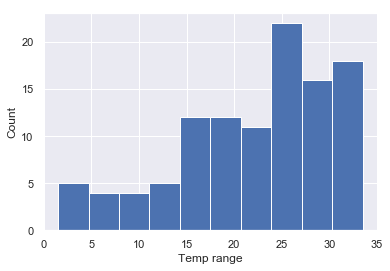

In [366]:
plt.hist(c1['Max Temp (°C)'], range = (c1['Max Temp (°C)'].min(), c1['Max Temp (°C)'].max()))
plt.xlabel('Temp range')
plt.ylabel('Count')

Text(0,0.5,'Count')

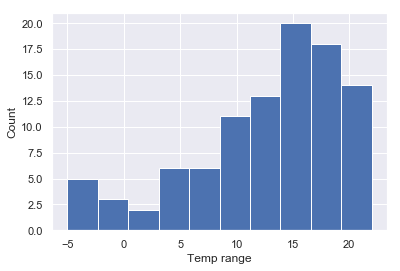

In [367]:
plt.hist(c1['Min Temp (°C)'], range = (c1['Min Temp (°C)'].min(), c1['Min Temp (°C)'].max()), histtype = 'bar')
plt.xlabel('Temp range')
plt.ylabel('Count')

In [368]:
sns.kdeplot(c1['Max Temp (°C)'])

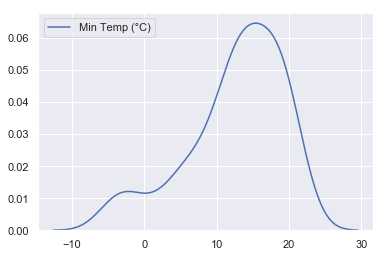

In [369]:
sns.kdeplot(c1['Min Temp (°C)'])

In [370]:
c1['Heat Deg Days (°C)']

181     0.0
182     0.0
183     0.5
184     0.0
185     0.0
187     0.0
188     1.7
189     0.0
190     0.0
191     0.0
192     0.0
194     0.0
195     0.0
196     0.0
197     0.0
198     0.0
199     0.0
200     0.0
202     0.0
203     0.0
204     NaN
205     0.0
206     0.0
207     0.0
208     0.0
210     0.0
211     0.0
212     0.0
213     0.0
215     0.0
       ... 
298     9.2
300     5.0
306     3.7
307     4.0
308     1.5
309     3.0
310     8.2
312    11.5
315     9.0
318     7.0
321     4.0
322     7.2
324    17.2
325    19.3
330    10.2
332     NaN
335    16.2
337     NaN
340    17.7
344     8.7
345     6.5
346     5.0
350     NaN
352    18.5
353    17.7
355    10.2
356     9.7
358     NaN
359     NaN
362    15.7
Name: Heat Deg Days (°C), Length: 115, dtype: float64

In [371]:
plt.hist(c1['Heat Deg Days (°C)'].dropna())

(array([66.,  7.,  6.,  3.,  5.,  4.,  0.,  0.,  3.,  4.]),
 array([ 0.  ,  1.93,  3.86,  5.79,  7.72,  9.65, 11.58, 13.51, 15.44,
        17.37, 19.3 ]),
 <a list of 10 Patch objects>)

In [372]:
plt.hist(c1['Cool Deg Days (°C)'].dropna())

(array([47.,  4.,  4., 10.,  5.,  6.,  7.,  8.,  5.,  2.]),
 array([0.  , 0.93, 1.86, 2.79, 3.72, 4.65, 5.58, 6.51, 7.44, 8.37, 9.3 ]),
 <a list of 10 Patch objects>)

In [373]:
c1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 181 to 362
Data columns (total 13 columns):
Date                  115 non-null datetime64[ns]
Year                  115 non-null int64
Month                 115 non-null int64
Day                   115 non-null int64
Max Temp (°C)         109 non-null float64
Min Temp (°C)         98 non-null float64
Mean Temp (°C)        98 non-null float64
Heat Deg Days (°C)    98 non-null float64
Cool Deg Days (°C)    98 non-null float64
Total Rain (mm)       115 non-null float64
Total Snow (cm)       115 non-null float64
Total Precip (mm)     115 non-null float64
Snow on Grnd (cm)     115 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(3)
memory usage: 12.6 KB


(array([ 5.,  2.,  1.,  8.,  5., 11., 14., 19., 17., 16.]),
 array([-1.3 ,  1.56,  4.42,  7.28, 10.14, 13.  , 15.86, 18.72, 21.58,
        24.44, 27.3 ]),
 <a list of 10 Patch objects>)

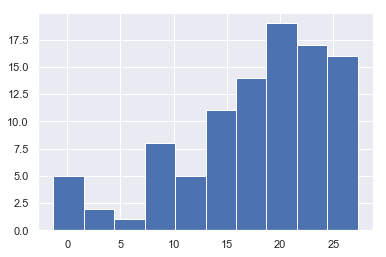

In [374]:
plt.hist(c1['Mean Temp (°C)'].dropna())

In [375]:
#creating week column
c1['week'] = c1['Date'].dt.week

In [376]:
#group by week
c1_grp = c1.groupby('week')

In [377]:
c1.aggregate(['mean', 'min', 'max'])

Date    Year      Month        Day  Max Temp (°C)  Min Temp (°C)  \
min  2015-07-01  2015.0   7.000000   1.000000       1.500000      -5.000000   
max  2015-12-29  2015.0  12.000000  31.000000      33.500000      22.000000   
mean        NaT  2015.0   9.121739  15.321739      22.087156      12.571429   

      Mean Temp (°C)  Heat Deg Days (°C)  Cool Deg Days (°C)  Total Rain (mm)  \
min        -1.300000            0.000000            0.000000          0.00000   
max        27.300000           19.300000            9.300000         57.20000   
mean       17.627551            2.963265            2.590816          2.56087   

      Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)       week  
min          0.000000           0.000000            0.00000  27.000000  
max         10.000000          57.200000            7.00000  53.000000  
mean         0.086957           2.647826            0.06087  38.191304

In [378]:
#dropping unnecessary coulmns and aggregating on remaining columns
cols = c1.drop(['Date', 'Year', 'Month', 'Day'], axis=1).columns
climate_2015 = c1_grp[cols].mean()

In [379]:
climate_2015

Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  Heat Deg Days (°C)  \
week                                                                     
27        25.500000      13.200000       19.360000            0.100000   
28        24.833333      15.333333       20.100000            0.283333   
29        28.750000      17.583333       23.183333            0.000000   
30        29.750000      16.600000       23.060000            0.000000   
31        31.583333      17.500000       24.566667            0.000000   
32        27.200000      16.000000       21.650000            0.000000   
33        29.625000      18.250000       23.950000            0.000000   
34        28.416667      18.416667       23.450000            0.000000   
35        24.000000      16.500000       20.250000            0.750000   
36        30.416667      18.700000       24.460000            0.000000   
37        23.500000      14.900000       19.240000            1.280000   
38        24.750000      16.250000       20.550000            0.000000   
39        26.000000      14.500000       20.000000            0.000000   
40        19.700000      14.125000       17.725000            1.925000   
41        21.200000      12.000000       16.620000            1.380000   
42        17.000000       8.750000       14.300000            4.100000   
43        19.800000      11.500000       15.680000            2.320000   
44        15.750000       6.000000       10.900000            7.100000   
45        19.500000       8.300000       13.920000            4.080000   
46        14.000000       3.666667        8.833333            9.166667   
47         8.500000       3.625000        6.075000           11.925000   
48         8.250000       3.500000        7.800000           10.200000   
49         7.000000      -4.000000        1.800000           16.200000   
50        11.750000       5.250000        8.525000            9.475000   
51         6.333333      -4.500000       -0.100000           18.100000   
52        12.166667       2.500000        8.050000            9.950000   
53         6.500000      -2.000000        2.300000           15.700000   

      Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  \
week                                                                            
27              1.460000         0.000000              0.0           0.000000   
28              2.383333         4.416667              0.0           4.416667   
29              5.183333         1.400000              0.0           1.400000   
30              5.060000         0.900000              0.0           0.900000   
31              6.566667         4.633333              0.0           4.633333   
32              3.650000         0.280000              0.0           0.280000   
33              5.950000         2.900000              0.0           2.900000   
34              5.450000         5.133333              0.0           5.133333   
35              3.000000         0.000000              0.0           0.000000   
36              6.460000        10.100000              0.0          10.100000   
37              2.520000         0.960000              0.0           0.960000   
38              2.550000         0.550000              0.0           0.550000   
39              2.000000         0.000000              0.0           0.000000   
40              1.650000         3.720000              0.0           3.720000   
41              0.000000         0.000000              0.0           0.000000   
42              0.400000         0.300000              0.0           0.300000   
43              0.000000         0.840000              0.0           0.840000   
44              0.000000         0.900000              0.0           0.900000   
45              0.000000         1.720000              0.0           1.720000   
46              0.000000         5.133333              0.0           5.133333   
47              0.000000         3.300000              2.5           5.800000

In [380]:
climate_2015.shape

(27, 10)

# 2016 Climate Data

In [381]:
climate_2016 = pd.read_csv("ONTARIO-2016.csv", header = 22)

In [382]:
climate_2016

Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  \
0    2016-01-01  2016      1    1          NaN            NaN           NaN   
1    2016-01-02  2016      1    2          NaN            NaN           NaN   
2    2016-01-03  2016      1    3          NaN            NaN           NaN   
3    2016-01-04  2016      1    4          NaN            NaN           NaN   
4    2016-01-05  2016      1    5          NaN            NaN           NaN   
5    2016-01-06  2016      1    6          NaN            NaN           NaN   
6    2016-01-07  2016      1    7          NaN            NaN           NaN   
7    2016-01-08  2016      1    8            †            7.0           NaN   
8    2016-01-09  2016      1    9            †           11.0           NaN   
9    2016-01-10  2016      1   10            †           -1.5           NaN   
10   2016-01-11  2016      1   11          NaN            NaN           NaN   
11   2016-01-12  2016      1   12            †           -5.0           NaN   
12   2016-01-13  2016      1   13          NaN            NaN           NaN   
13   2016-01-14  2016      1   14            †            2.5           NaN   
14   2016-01-15  2016      1   15            †            4.5           NaN   
15   2016-01-16  2016      1   16          NaN            NaN           NaN   
16   2016-01-17  2016      1   17          NaN            NaN           NaN   
17   2016-01-18  2016      1   18          NaN            NaN           NaN   
18   2016-01-19  2016      1   19          NaN            NaN           NaN   
19   2016-01-20  2016      1   20          NaN            NaN           NaN   
20   2016-01-21  2016      1   21            †           -3.0           NaN   
21   2016-01-22  2016      1   22          NaN            NaN           NaN   
22   2016-01-23  2016      1   23          NaN            NaN           NaN   
23   2016-01-24  2016      1   24            †            3.0           NaN   
24   2016-01-25  2016      1   25            †            5.5           NaN   
25   2016-01-26  2016      1   26            †            6.0           NaN   
26   2016-01-27  2016      1   27          NaN            NaN           NaN   
27   2016-01-28  2016      1   28          NaN            NaN           NaN   
28   2016-01-29  2016      1   29          NaN            NaN           NaN   
29   2016-01-30  2016      1   30          NaN            NaN           NaN   
..          ...   ...    ...  ...          ...            ...           ...   
336  2016-12-02  2016     12    2          NaN            NaN           NaN   
337  2016-12-03  2016     12    3            †            4.0           NaN   
338  2016-12-04  2016     12    4          NaN            NaN           NaN   
339  2016-12-05  2016     12    5          NaN            NaN           NaN   
340  2016-12-06  2016     12    6            †            5.0           NaN   
341  2016-12-07  2016     12    7          NaN            NaN           NaN   
342  2016-12-08  2016     12    8            †           -2.0           NaN   
343  2016-12-09  2016     12    9          NaN            NaN           NaN   
344  2016-12-10  2016     12   10            †            0.0           NaN   
345  2016-12-11  2016     12   11            †            1.0           NaN   
346  2016-12-12  2016     12   12            †            2.0           NaN   
347  2016-12-13  2016     12   13            †           -2.0           NaN   
348  2016-12-14  2016     12   14          NaN            NaN           NaN   
349  2016-12-15  2016     12   15          NaN            NaN           NaN   
350  2016-12-16  2016     12   16            †           -3.5           NaN   
351  2016-12-17  2016     12   17            †           -1.0           NaN   
352  2016-12-18  2016     12   18          NaN            NaN           NaN   
353  2016-12-19  2016     12   19          NaN            NaN           NaN   
354  2016-12-20  2016     12   20            †          

In [383]:
climate_2016.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (°C)',
       'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)',
       'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag',
       'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)',
       'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag',
       'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)',
       'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)',
       'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)',
       'Spd of Max Gust Flag'],
      dtype='object')

In [384]:
climate_2016.shape

(366, 27)

In [385]:
climate_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 27 columns):
Date/Time                    366 non-null object
Year                         366 non-null int64
Month                        366 non-null int64
Day                          366 non-null int64
Data Quality                 227 non-null object
Max Temp (°C)                226 non-null float64
Max Temp Flag                1 non-null object
Min Temp (°C)                219 non-null float64
Min Temp Flag                8 non-null object
Mean Temp (°C)               219 non-null float64
Mean Temp Flag               8 non-null object
Heat Deg Days (°C)           219 non-null float64
Heat Deg Days Flag           8 non-null object
Cool Deg Days (°C)           219 non-null float64
Cool Deg Days Flag           8 non-null object
Total Rain (mm)              227 non-null float64
Total Rain Flag              3 non-null object
Total Snow (cm)              227 non-null float64
Total Snow Flag      

In [386]:
climate_2016['Date/Time'] = pd.to_datetime(climate_2016['Date/Time'], errors = 'coerce')

In [387]:
climate_2016['Date/Time'].dtype

dtype('<M8[ns]')

In [388]:
climate_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 27 columns):
Date/Time                    366 non-null datetime64[ns]
Year                         366 non-null int64
Month                        366 non-null int64
Day                          366 non-null int64
Data Quality                 227 non-null object
Max Temp (°C)                226 non-null float64
Max Temp Flag                1 non-null object
Min Temp (°C)                219 non-null float64
Min Temp Flag                8 non-null object
Mean Temp (°C)               219 non-null float64
Mean Temp Flag               8 non-null object
Heat Deg Days (°C)           219 non-null float64
Heat Deg Days Flag           8 non-null object
Cool Deg Days (°C)           219 non-null float64
Cool Deg Days Flag           8 non-null object
Total Rain (mm)              227 non-null float64
Total Rain Flag              3 non-null object
Total Snow (cm)              227 non-null float64
Total Snow Fl

In [389]:
c2 = climate_2016

In [390]:
c2.rename(columns = {'Date/Time': 'Date'}, inplace = True)

In [391]:
#we only need climate data from July 2015
c2 = c2[c2['Date'] <= pd.to_datetime('2016-06-30')]

In [392]:
c2.shape

(182, 27)

In [393]:
c2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 181
Data columns (total 27 columns):
Date                         182 non-null datetime64[ns]
Year                         182 non-null int64
Month                        182 non-null int64
Day                          182 non-null int64
Data Quality                 100 non-null object
Max Temp (°C)                99 non-null float64
Max Temp Flag                1 non-null object
Min Temp (°C)                93 non-null float64
Min Temp Flag                7 non-null object
Mean Temp (°C)               93 non-null float64
Mean Temp Flag               7 non-null object
Heat Deg Days (°C)           93 non-null float64
Heat Deg Days Flag           7 non-null object
Cool Deg Days (°C)           93 non-null float64
Cool Deg Days Flag           7 non-null object
Total Rain (mm)              100 non-null float64
Total Rain Flag              2 non-null object
Total Snow (cm)              100 non-null float64
Total Snow Flag   

In [394]:
round((c2.isnull().sum() / len(c2.index)) *100, 2)
#below is a series

Date                           0.00
Year                           0.00
Month                          0.00
Day                            0.00
Data Quality                  45.05
Max Temp (°C)                 45.60
Max Temp Flag                 99.45
Min Temp (°C)                 48.90
Min Temp Flag                 96.15
Mean Temp (°C)                48.90
Mean Temp Flag                96.15
Heat Deg Days (°C)            48.90
Heat Deg Days Flag            96.15
Cool Deg Days (°C)            48.90
Cool Deg Days Flag            96.15
Total Rain (mm)               45.05
Total Rain Flag               98.90
Total Snow (cm)               45.05
Total Snow Flag               97.25
Total Precip (mm)             45.05
Total Precip Flag             96.70
Snow on Grnd (cm)             45.05
Snow on Grnd Flag             97.80
Dir of Max Gust (10s deg)    100.00
Dir of Max Gust Flag         100.00
Spd of Max Gust (km/h)       100.00
Spd of Max Gust Flag         100.00
dtype: float64

In [395]:
c2['Mean Temp Flag'].value_counts()

M    7
Name: Mean Temp Flag, dtype: int64

In [396]:
#dropping columns with high percentage of null values
#storing the series in a variable
temp = round((c2.isnull().sum() / len(c2.index)) *100, 2)
type(temp)

pandas.core.series.Series

In [397]:
#finding the columns having null percentage greater than 50
temp[temp.values > 50]

Max Temp Flag                 99.45
Min Temp Flag                 96.15
Mean Temp Flag                96.15
Heat Deg Days Flag            96.15
Cool Deg Days Flag            96.15
Total Rain Flag               98.90
Total Snow Flag               97.25
Total Precip Flag             96.70
Snow on Grnd Flag             97.80
Dir of Max Gust (10s deg)    100.00
Dir of Max Gust Flag         100.00
Spd of Max Gust (km/h)       100.00
Spd of Max Gust Flag         100.00
dtype: float64

In [398]:
cols = temp[temp.values > 50].index
cols

Index(['Max Temp Flag', 'Min Temp Flag', 'Mean Temp Flag',
       'Heat Deg Days Flag', 'Cool Deg Days Flag', 'Total Rain Flag',
       'Total Snow Flag', 'Total Precip Flag', 'Snow on Grnd Flag',
       'Dir of Max Gust (10s deg)', 'Dir of Max Gust Flag',
       'Spd of Max Gust (km/h)', 'Spd of Max Gust Flag'],
      dtype='object')

In [399]:
c2.drop(cols, axis=1, inplace=True)
c2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 181
Data columns (total 14 columns):
Date                  182 non-null datetime64[ns]
Year                  182 non-null int64
Month                 182 non-null int64
Day                   182 non-null int64
Data Quality          100 non-null object
Max Temp (°C)         99 non-null float64
Min Temp (°C)         93 non-null float64
Mean Temp (°C)        93 non-null float64
Heat Deg Days (°C)    93 non-null float64
Cool Deg Days (°C)    93 non-null float64
Total Rain (mm)       100 non-null float64
Total Snow (cm)       100 non-null float64
Total Precip (mm)     100 non-null float64
Snow on Grnd (cm)     100 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(3), object(1)
memory usage: 21.3+ KB


In [400]:
c2['Data Quality'].value_counts()

†    100
Name: Data Quality, dtype: int64

In [401]:
#dropping the column Data Quality
c2.drop(['Data Quality'], axis=1, inplace=True)

In [402]:
c2

Date  Year  Month  Day  Max Temp (°C)  Min Temp (°C)  \
0   2016-01-01  2016      1    1            NaN            NaN   
1   2016-01-02  2016      1    2            NaN            NaN   
2   2016-01-03  2016      1    3            NaN            NaN   
3   2016-01-04  2016      1    4            NaN            NaN   
4   2016-01-05  2016      1    5            NaN            NaN   
5   2016-01-06  2016      1    6            NaN            NaN   
6   2016-01-07  2016      1    7            NaN            NaN   
7   2016-01-08  2016      1    8            7.0          -14.0   
8   2016-01-09  2016      1    9           11.0            3.0   
9   2016-01-10  2016      1   10           -1.5           -5.0   
10  2016-01-11  2016      1   11            NaN            NaN   
11  2016-01-12  2016      1   12           -5.0          -12.0   
12  2016-01-13  2016      1   13            NaN            NaN   
13  2016-01-14  2016      1   14            2.5          -10.5   
14  2016-01-15  2016      1   15            4.5           -2.0   
15  2016-01-16  2016      1   16            NaN            NaN   
16  2016-01-17  2016      1   17            NaN            NaN   
17  2016-01-18  2016      1   18            NaN            NaN   
18  2016-01-19  2016      1   19            NaN            NaN   
19  2016-01-20  2016      1   20            NaN            NaN   
20  2016-01-21  2016      1   21           -3.0            NaN   
21  2016-01-22  2016      1   22            NaN            NaN   
22  2016-01-23  2016      1   23            NaN            NaN   
23  2016-01-24  2016      1   24            3.0            NaN   
24  2016-01-25  2016      1   25            5.5           -9.0   
25  2016-01-26  2016      1   26            6.0            NaN   
26  2016-01-27  2016      1   27            NaN            NaN   
27  2016-01-28  2016      1   28            NaN            NaN   
28  2016-01-29  2016      1   29            NaN            NaN   
29  2016-01-30  2016      1   30            NaN            NaN   
..         ...   ...    ...  ...            ...            ...   
152 2016-06-01  2016      6    1            NaN            NaN   
153 2016-06-02  2016      6    2           30.0           16.0   
154 2016-06-03  2016      6    3            NaN            NaN   
155 2016-06-04  2016      6    4           26.5           14.0   
156 2016-06-05  2016      6    5           25.0           17.0   
157 2016-06-06  2016      6    6           29.0           15.0   
158 2016-06-07  2016      6    7            NaN            NaN   
159 2016-06-08  2016      6    8           21.5            9.0   
160 2016-06-09  2016      6    9           25.0            9.5   
161 2016-06-10  2016      6   10           29.0           13.5   
162 2016-06-11  2016      6   11           35.0           19.0   
163 2016-06-12  2016      6   12           26.5           16.0   
164 2016-06-13  2016      6   13           24.0            8.5   
165 2016-06-14  2016      6   14            NaN            NaN   
166 2016-06-15  2016      6   15            NaN            NaN   
167 2016-06-16  2016      6   16           27.5           17.0   
168 2016-06-17  2016      6   17            NaN            NaN   
169 2016-06-18  2016      6   18           30.5           13.0   
170 2016-06-19  2016      6   19           33.0           16.5   
171 2016-06-20  2016      6   20           34.5           20.5   
172 2016-06-21  2016      6   21            NaN            NaN   
173 2016-06-22  2016      6   22           30.5           17.0   
174 2016-06-23  2016      6   23            NaN            NaN   
175 2016-06-24  2016      6   24           29.0           13.0   
176 2016-06-25  2016      6   25           30.5           13.0   
177 2016-06-26  2016      6   26           34.0           18.5   
178 2016-06-27  2016      6   27           34.5           20.0   
179 2016-06-28  2016      6   28            NaN            NaN   
180 2016-06-29  2016      6   29            NaN   

Upon visual inspection it is evident that weather data for few rows are completely missing

In [403]:
c2.dropna(thresh = 5, inplace = True)

In [404]:
print(c2.shape, "\n\n")
c2.info()

(100, 13) 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 7 to 181
Data columns (total 13 columns):
Date                  100 non-null datetime64[ns]
Year                  100 non-null int64
Month                 100 non-null int64
Day                   100 non-null int64
Max Temp (°C)         99 non-null float64
Min Temp (°C)         93 non-null float64
Mean Temp (°C)        93 non-null float64
Heat Deg Days (°C)    93 non-null float64
Cool Deg Days (°C)    93 non-null float64
Total Rain (mm)       100 non-null float64
Total Snow (cm)       100 non-null float64
Total Precip (mm)     100 non-null float64
Snow on Grnd (cm)     100 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(3)
memory usage: 10.9 KB


In [405]:
c2['Max Temp (°C)']

7       7.0
8      11.0
9      -1.5
11     -5.0
13      2.5
14      4.5
20     -3.0
23      3.0
24      5.5
25      6.0
32      9.5
33     13.0
34      1.5
37      8.5
38      5.0
43     -8.5
44     -5.0
48      6.5
49     17.5
50     17.5
54      1.0
55      1.0
59     10.5
60     10.5
63      2.0
65      7.5
66     18.0
68     20.0
72     11.0
74     15.0
       ... 
134    11.5
135    11.0
136    21.0
138    18.5
144    29.0
145    30.0
146    30.0
147    30.0
148    31.0
149    31.0
153    30.0
155    26.5
156    25.0
157    29.0
159    21.5
160    25.0
161    29.0
162    35.0
163    26.5
164    24.0
167    27.5
169    30.5
170    33.0
171    34.5
173    30.5
175    29.0
176    30.5
177    34.0
178    34.5
181    30.0
Name: Max Temp (°C), Length: 100, dtype: float64

In [406]:
c2['Max Temp (°C)'].max()

35.0

Text(0,0.5,'Temperature')

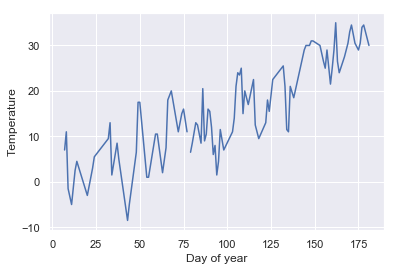

In [407]:
plt.plot(c2['Max Temp (°C)'])
plt.xlabel('Day of year')
plt.ylabel('Temperature')

Text(0,0.5,'Count')

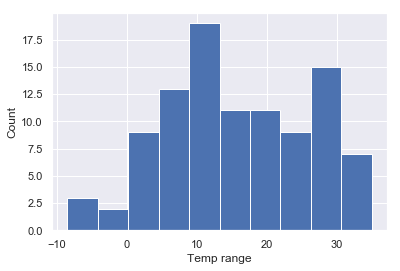

In [408]:
plt.hist(c2['Max Temp (°C)'].dropna())
plt.xlabel('Temp range')
plt.ylabel('Count')

Text(0,0.5,'Count')

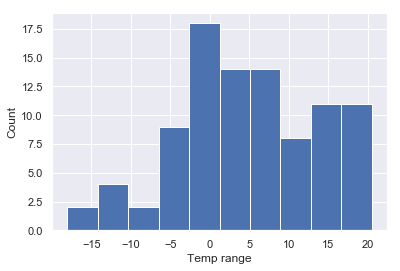

In [409]:
plt.hist(c2['Min Temp (°C)'].dropna())
plt.xlabel('Temp range')
plt.ylabel('Count')

In [410]:
sns.kdeplot(c2['Max Temp (°C)'])

In [411]:
sns.kdeplot(c2['Min Temp (°C)'])

In [412]:
c2['Heat Deg Days (°C)']

7      21.5
8      11.0
9      21.3
11     26.5
13     22.0
14     16.7
20      NaN
23      NaN
24     19.8
25      NaN
32     16.0
33     10.7
34     17.7
37      NaN
38     16.0
43     30.3
44     29.5
48     20.8
49     11.0
50      6.7
54     18.0
55     19.3
59     13.2
60     15.2
63     19.0
65      NaN
66     10.0
68      3.5
72     10.0
74      7.0
       ... 
134     8.2
135    11.2
136     5.5
138     5.7
144     0.0
145     0.0
146     0.0
147     0.0
148     0.0
149     0.0
153     0.0
155     0.0
156     0.0
157     0.0
159     2.7
160     0.7
161     0.0
162     0.0
163     0.0
164     1.7
167     0.0
169     0.0
170     0.0
171     0.0
173     0.0
175     0.0
176     0.0
177     0.0
178     0.0
181     0.0
Name: Heat Deg Days (°C), Length: 100, dtype: float64

(array([29., 12., 12., 12.,  6., 10.,  6.,  3.,  1.,  2.]),
 array([ 0.  ,  3.03,  6.06,  9.09, 12.12, 15.15, 18.18, 21.21, 24.24,
        27.27, 30.3 ]),
 <a list of 10 Patch objects>)

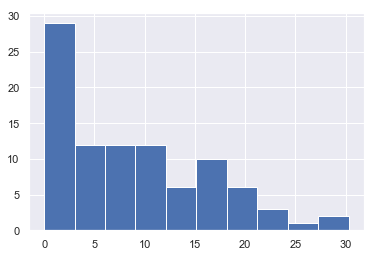

In [413]:
plt.hist(c2['Heat Deg Days (°C)'].dropna())

(array([70.,  1.,  1.,  5.,  5.,  1.,  4.,  2.,  1.,  3.]),
 array([0.  , 0.95, 1.9 , 2.85, 3.8 , 4.75, 5.7 , 6.65, 7.6 , 8.55, 9.5 ]),
 <a list of 10 Patch objects>)

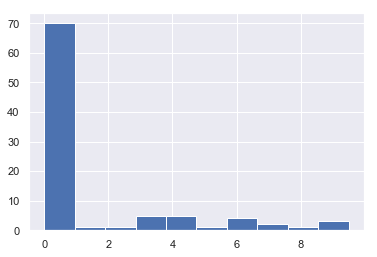

In [414]:
plt.hist(c2['Cool Deg Days (°C)'].dropna())

In [415]:
c2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 7 to 181
Data columns (total 13 columns):
Date                  100 non-null datetime64[ns]
Year                  100 non-null int64
Month                 100 non-null int64
Day                   100 non-null int64
Max Temp (°C)         99 non-null float64
Min Temp (°C)         93 non-null float64
Mean Temp (°C)        93 non-null float64
Heat Deg Days (°C)    93 non-null float64
Cool Deg Days (°C)    93 non-null float64
Total Rain (mm)       100 non-null float64
Total Snow (cm)       100 non-null float64
Total Precip (mm)     100 non-null float64
Snow on Grnd (cm)     100 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(3)
memory usage: 10.9 KB


In [416]:
plt.hist(c2['Mean Temp (°C)'].dropna())

(array([ 3.,  0.,  8., 12., 14., 15., 14.,  5., 12., 10.]),
 array([-12.3 ,  -8.32,  -4.34,  -0.36,   3.62,   7.6 ,  11.58,  15.56,
         19.54,  23.52,  27.5 ]),
 <a list of 10 Patch objects>)

In [417]:
#creating week column
c2['week'] = c2['Date'].dt.week

In [418]:
#group by week
c2_grp = c2.groupby('week')

In [419]:
c2.aggregate(['mean', 'min', 'max'])

Date    Year  Month   Day  Max Temp (°C)  Min Temp (°C)  \
min  2016-01-08  2016.0    1.0   1.0      -8.500000     -18.000000   
max  2016-06-30  2016.0    6.0  31.0      35.000000      20.500000   
mean        NaT  2016.0    3.8  15.7      15.974747       4.612903   

      Mean Temp (°C)  Heat Deg Days (°C)  Cool Deg Days (°C)  Total Rain (mm)  \
min       -12.300000            0.000000             0.00000             0.00   
max        27.500000           30.300000             9.50000            32.60   
mean       10.673118            8.608602             1.28172             2.61   

      Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)   week  
min              0.00               0.00               0.00   1.00  
max              7.00              32.60              12.00  26.00  
mean             0.34               2.95               0.55  14.36

In [420]:
#dropping unnecessary coulmns and aggregating on remaining columns
cols = c2.drop(['Date', 'Year', 'Month', 'Day'], axis=1).columns
climate_2016 = c2_grp[cols].mean()

In [421]:
climate_2016

Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  Heat Deg Days (°C)  \
week                                                                     
1          5.500000      -5.333333        0.066667           17.933333   
2          0.666667      -8.166667       -3.733333           21.733333   
3          0.000000            NaN             NaN                 NaN   
4          5.750000      -9.000000       -1.800000           19.800000   
5          8.125000      -1.666667        3.200000           14.800000   
6         -2.833333     -11.666667       -7.266667           25.266667   
7         13.833333      -3.500000        5.166667           12.833333   
8          1.000000      -2.250000       -0.650000           18.650000   
9          7.625000      -3.333333        2.200000           15.800000   
10        16.333333       4.000000       10.166667            7.833333   
11        12.400000       3.875000        8.900000            9.100000   
12        12.600000      -1.200000        5.720000           12.280000   
13        11.000000       2.714286        6.871429           11.128571   
14         6.125000      -3.625000        1.250000           16.750000   
15        18.700000       1.100000        9.920000            8.080000   
16        19.250000       6.000000       12.625000            5.375000   
17        14.833333       6.000000       10.433333            7.566667   
18        17.600000       6.200000       11.920000            6.080000   
19        17.250000       8.375000       12.850000            5.225000   
20        19.750000       5.000000       12.400000            5.600000   
21        30.166667      16.083333       23.150000            0.000000   
22        27.166667      15.666667       21.433333            0.000000   
23        27.666667      13.666667       20.700000            0.566667   
24        28.750000      13.750000       21.300000            0.425000   
25        31.700000      16.400000       24.080000            0.000000   
26        32.250000      16.500000       24.400000            0.000000   

      Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  \
week                                                                            
1               0.000000         7.866667         2.333333          10.200000   
2               0.000000         2.533333         0.000000           2.533333   
3                    NaN         0.000000         0.000000           0.000000   
4               0.000000         0.000000         0.000000           0.000000   
5               0.000000         2.650000         0.000000           2.650000   
6               0.000000         0.000000         2.666667           2.666667   
7               0.000000         0.000000         0.000000           0.000000   
8               0.000000        12.700000         3.000000          15.700000   
9               0.000000         0.750000         1.750000           2.500000   
10              0.000000         9.000000         0.000000           9.000000   
11              0.000000         0.333333         0.000000           0.333333   
12              0.000000        12.800000         0.000000          12.800000   
13              0.000000         2.828571         0.542857           3.371429   
14              0.000000         2.350000         0.550000           2.900000   
15              0.000000         0.000000         0.000000           0.000000   
16              0.000000         0.000000         0.000000           0.000000   
17              0.000000         5.266667         0.000000           5.266667   
18              0.000000         2.160000         0.000000           2.160000   
19              0.075000         4.250000         0.000000           4.250000   
20              0.000000         0.300000         0.000000           0.300000   
21              5.150000         0.366667         0.000000           0.366667   
22              3.433333         4.200000         0.000000           4

Week 3 has nan values. Replacing the nan values for week 3 with mean of values from week 2 and week 4

In [431]:
climate_2016.loc[3]

Max Temp (°C)         0.0
Min Temp (°C)         NaN
Mean Temp (°C)        NaN
Heat Deg Days (°C)    NaN
Cool Deg Days (°C)    NaN
Total Rain (mm)       0.0
Total Snow (cm)       0.0
Total Precip (mm)     0.0
Snow on Grnd (cm)     0.0
week                  3.0
Name: 3, dtype: float64

In [437]:
climate_2016.['Min Temp (°C)'] = climate_2016.loc[2]['Min Temp (°C)'] + climate_2016.loc[4]['Min Temp (°C)']
climate_2016.loc[3]['Min Temp (°C)'].str.replace()
climate_2016.loc[3]['Min Temp (°C)']

nan

In [440]:
climate_2016[3]

KeyError: 3

In [436]:
climate_2016.loc[2]['Min Temp (°C)'] + climate_2016.loc[4]['Min Temp (°C)']

-17.166666666666664

In [422]:
climate_2016.shape

(26, 10)

# Merging 2015 and 2016 data

In [423]:
climate_merge = pd.concat([climate_2015, climate_2016])

In [424]:
climate_merge

Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  Heat Deg Days (°C)  \
week                                                                     
27        25.500000      13.200000       19.360000            0.100000   
28        24.833333      15.333333       20.100000            0.283333   
29        28.750000      17.583333       23.183333            0.000000   
30        29.750000      16.600000       23.060000            0.000000   
31        31.583333      17.500000       24.566667            0.000000   
32        27.200000      16.000000       21.650000            0.000000   
33        29.625000      18.250000       23.950000            0.000000   
34        28.416667      18.416667       23.450000            0.000000   
35        24.000000      16.500000       20.250000            0.750000   
36        30.416667      18.700000       24.460000            0.000000   
37        23.500000      14.900000       19.240000            1.280000   
38        24.750000      16.250000       20.550000            0.000000   
39        26.000000      14.500000       20.000000            0.000000   
40        19.700000      14.125000       17.725000            1.925000   
41        21.200000      12.000000       16.620000            1.380000   
42        17.000000       8.750000       14.300000            4.100000   
43        19.800000      11.500000       15.680000            2.320000   
44        15.750000       6.000000       10.900000            7.100000   
45        19.500000       8.300000       13.920000            4.080000   
46        14.000000       3.666667        8.833333            9.166667   
47         8.500000       3.625000        6.075000           11.925000   
48         8.250000       3.500000        7.800000           10.200000   
49         7.000000      -4.000000        1.800000           16.200000   
50        11.750000       5.250000        8.525000            9.475000   
51         6.333333      -4.500000       -0.100000           18.100000   
52        12.166667       2.500000        8.050000            9.950000   
53         6.500000      -2.000000        2.300000           15.700000   
1          5.500000      -5.333333        0.066667           17.933333   
2          0.666667      -8.166667       -3.733333           21.733333   
3          0.000000            NaN             NaN                 NaN   
4          5.750000      -9.000000       -1.800000           19.800000   
5          8.125000      -1.666667        3.200000           14.800000   
6         -2.833333     -11.666667       -7.266667           25.266667   
7         13.833333      -3.500000        5.166667           12.833333   
8          1.000000      -2.250000       -0.650000           18.650000   
9          7.625000      -3.333333        2.200000           15.800000   
10        16.333333       4.000000       10.166667            7.833333   
11        12.400000       3.875000        8.900000            9.100000   
12        12.600000      -1.200000        5.720000           12.280000   
13        11.000000       2.714286        6.871429           11.128571   
14         6.125000      -3.625000        1.250000           16.750000   
15        18.700000       1.100000        9.920000            8.080000   
16        19.250000       6.000000       12.625000            5.375000   
17        14.833333       6.000000       10.433333            7.566667   
18        17.600000       6.200000       11.920000            6.080000   
19        17.250000       8.375000       12.850000            5.225000   
20        19.750000       5.000000       12.400000            5.600000   
21        30.166667      16.083333       23.150000            0.000000   
22        27.166667      15.666667       21.433333            0.000000   
23        27.666667      13.666667       20.700000            0.566667   
24        28.750000      13.750000       21.300000            0.425000   
25        31.700000      16.400000       24.080000            0.000000   
26        